# Mehrnaz Jalili

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy.stats import iqr
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K
from keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from keras.layers import Dense, GRU
import warnings
warnings.filterwarnings('ignore')


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read dataset
site_1 = pd.read_csv('/content/drive/MyDrive/solar/CED - 505 Dutton (1).csv', index_col='Time', parse_dates=['Time'])
site_2 = pd.read_csv('/content/drive/MyDrive/solar/CED - 660 Superior Dr.csv', index_col='Time', parse_dates=['Time'])
site_3 = pd.read_csv('/content/drive/MyDrive/solar/Evolv1 - 420 Wes Graham Way (20).csv', index_col='Time', parse_dates=['Time'])

In [ ]:
print(site_1.shape , site_2.shape , site_3.shape)

(342718, 41) (342718, 41) (342718, 96)


In [ ]:
site_1.head()

,Site Power,7E13A5B8-EE Power,7E13A5B8-EE Energy,7E13A5B8-EE Voltage,7E13A5B8-EE GF Resistance,7E13A5B8-EE Temperature,7E13A5D1-07 Power,7E13A5D1-07 Energy,7E13A5D1-07 Voltage,7E13A5D1-07 GF Resistance,...,7E142964-1F Power,7E142964-1F Energy,7E142964-1F Voltage,7E142964-1F GF Resistance,7E142964-1F Temperature,7E12506C-4C Power,7E12506C-4C Energy,7E12506C-4C Voltage,7E12506C-4C GF Resistance,7E12506C-4C Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,3.11591,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,3.11591,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,3.19804,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:15:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,3.08844,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,3.11591,NaN,NaN,NaN,NaN,NaN


In [ ]:
site_2.head()

,Site Power,7E109421-43 Power,7E109421-43 Energy,7E109421-43 Voltage,7E109421-43 GF Resistance,7E109421-43 Temperature,7E1093DD-FE Power,7E1093DD-FE Energy,7E1093DD-FE Voltage,7E1093DD-FE GF Resistance,...,7E1093A9-CA Power,7E1093A9-CA Energy,7E1093A9-CA Voltage,7E1093A9-CA GF Resistance,7E1093A9-CA Temperature,7E121E7F-2D Power,7E121E7F-2D Energy,7E121E7F-2D Voltage,7E121E7F-2D GF Resistance,7E121E7F-2D Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
site_3.head()

,Site Power,7E130FDC-7C Power,7E130FDC-7C Energy,7E130FDC-7C Voltage,7E130FDC-7C GF Resistance,7E130FDC-7C Temperature,7E140DE1-80 Power,7E140DE1-80 Energy,7E140DE1-80 Voltage,7E140DE1-80 GF Resistance,...,7E139A3F-6A Power,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Power,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,NaN,NaN,NaN,11.8299,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,34.0173,0.0,NaN,0.4375,NaN,30.2423
2020-01-01 00:05:00,NaN,0.0,0.0,NaN,NaN,11.8299,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.9370,0.0,0.0,0.4375,NaN,30.2123
2020-01-01 00:10:00,NaN,0.0,0.0,NaN,NaN,11.8842,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.9906,0.0,0.0,0.4375,NaN,30.2423
2020-01-01 00:15:00,0.0,0.0,0.0,NaN,NaN,11.8842,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.9102,0.0,0.0,0.4375,NaN,30.2423
2020-01-01 00:20:00,NaN,0.0,0.0,NaN,NaN,11.8299,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.8834,0.0,0.0,0.4375,NaN,30.2123


In [ ]:
site_1.tail()

,Site Power,7E13A5B8-EE Power,7E13A5B8-EE Energy,7E13A5B8-EE Voltage,7E13A5B8-EE GF Resistance,7E13A5B8-EE Temperature,7E13A5D1-07 Power,7E13A5D1-07 Energy,7E13A5D1-07 Voltage,7E13A5D1-07 GF Resistance,...,7E142964-1F Power,7E142964-1F Energy,7E142964-1F Voltage,7E142964-1F GF Resistance,7E142964-1F Temperature,7E12506C-4C Power,7E12506C-4C Energy,7E12506C-4C Voltage,7E12506C-4C GF Resistance,7E12506C-4C Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2023-04-04 23:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
site_2.tail()

,Site Power,7E109421-43 Power,7E109421-43 Energy,7E109421-43 Voltage,7E109421-43 GF Resistance,7E109421-43 Temperature,7E1093DD-FE Power,7E1093DD-FE Energy,7E1093DD-FE Voltage,7E1093DD-FE GF Resistance,...,7E1093A9-CA Power,7E1093A9-CA Energy,7E1093A9-CA Voltage,7E1093A9-CA GF Resistance,7E1093A9-CA Temperature,7E121E7F-2D Power,7E121E7F-2D Energy,7E121E7F-2D Voltage,7E121E7F-2D GF Resistance,7E121E7F-2D Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2023-04-04 23:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
site_3.tail()

,Site Power,7E130FDC-7C Power,7E130FDC-7C Energy,7E130FDC-7C Voltage,7E130FDC-7C GF Resistance,7E130FDC-7C Temperature,7E140DE1-80 Power,7E140DE1-80 Energy,7E140DE1-80 Voltage,7E140DE1-80 GF Resistance,...,7E139A3F-6A Power,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Power,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2023-04-04 23:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data preprocessing

In [ ]:
#creating a copy from the dataset
si_1 = site_1.copy()
si_2 = site_2.copy()
si_3 = site_3.copy()

In [ ]:
#converting the dataset every 60 min to one row
df_site_1 = si_1.resample('60min').mean()
df_site_2 = si_2.resample('60min').mean()
df_site_3 = si_3.resample('60min').mean()

In [ ]:
#shape of the resampled dataset
print(df_site_1.shape, df_site_2.shape , df_site_3.shape)

(28560, 41) (28560, 41) (28560, 96)


In [ ]:
#basic statistical details
df_site_1.describe(include='all',
                 datetime_is_numeric=True)

,Site Power,7E13A5B8-EE Power,7E13A5B8-EE Energy,7E13A5B8-EE Voltage,7E13A5B8-EE GF Resistance,7E13A5B8-EE Temperature,7E13A5D1-07 Power,7E13A5D1-07 Energy,7E13A5D1-07 Voltage,7E13A5D1-07 GF Resistance,...,7E142964-1F Power,7E142964-1F Energy,7E142964-1F Voltage,7E142964-1F GF Resistance,7E142964-1F Temperature,7E12506C-4C Power,7E12506C-4C Energy,7E12506C-4C Voltage,7E12506C-4C GF Resistance,7E12506C-4C Temperature
count,22455.000000,19165.000000,19118.000000,17841.000000,16519.000000,19165.000000,17790.000000,17743.000000,16326.000000,14798.000000,...,19369.000000,19322.000000,17736.000000,16671.000000,19369.000000,15007.000000,14944.000000,13410.000000,12511.000000,15007.000000
mean,27898.021685,4499.064598,387.617574,656.593409,3535.898024,27.147467,4563.643526,393.171733,698.000893,3280.013164,...,4267.107280,366.051927,652.805531,3631.387200,26.860828,2572.963816,222.141242,734.880443,5611.829157,23.431724
std,41227.872224,5809.122949,498.612578,325.189368,2131.366267,17.873681,5701.162238,489.180449,287.805076,1975.381962,...,5576.601222,478.206652,323.042532,2127.862630,17.767031,3088.517110,264.882056,253.177675,1533.062268,16.311667
min,0.000000,0.000000,0.000000,0.000000,0.000000,-18.476920,0.000000,-1000.000000,0.000000,0.000000,...,0.000000,0.000000,0.312500,760.095545,-18.421225,0.000000,-20.000000,0.000000,0.000000,-16.128100
25%,0.000000,0.000000,0.000000,526.982357,1655.389167,12.907564,8.839286,0.000000,717.660094,1629.110000,...,0.000000,0.000000,518.797420,1700.320000,12.975517,11.166667,1.428571,837.187521,4151.943750,9.610725
50%,3164.000000,1392.916667,124.666667,848.114667,2881.520000,25.265075,1672.458333,150.000000,847.041583,2707.680000,...,1255.250000,100.000000,845.239750,3035.255000,25.010100,1075.166667,93.333333,848.885375,6787.290000,22.873225
75%,45353.000000,7933.500000,666.666667,854.151083,5553.795000,42.499183,8073.395833,692.000000,852.597521,4352.185536,...,7435.333333,648.363636,848.963396,5750.016667,42.056425,4690.375000,408.333333,855.717521,6900.030000,38.242200
max,156841.000000,20012.000000,1836.363636,912.406250,6901.038000,64.562308,20018.833333,2000.000000,967.005333,6900.050000,...,20030.583333,1772.727273,923.807250,6900.050000,64.333592,12682.250000,1130.000000,923.880250,6900.050000,54.521617


In [ ]:
df_site_2.describe(include='all',
                 datetime_is_numeric=True)

,Site Power,7E109421-43 Power,7E109421-43 Energy,7E109421-43 Voltage,7E109421-43 GF Resistance,7E109421-43 Temperature,7E1093DD-FE Power,7E1093DD-FE Energy,7E1093DD-FE Voltage,7E1093DD-FE GF Resistance,...,7E1093A9-CA Power,7E1093A9-CA Energy,7E1093A9-CA Voltage,7E1093A9-CA GF Resistance,7E1093A9-CA Temperature,7E121E7F-2D Power,7E121E7F-2D Energy,7E121E7F-2D Voltage,7E121E7F-2D GF Resistance,7E121E7F-2D Temperature
count,21129.000000,16624.000000,16554.000000,14904.000000,14722.000000,16624.000000,16827.000000,16754.000000,16266.000000,15029.000000,...,16812.000000,16738.000000,15098.000000,14840.000000,16812.000000,19680.000000,19608.000000,18386.000000,15758.000000,19680.000000
mean,31014.144036,5186.890000,447.642798,766.485257,4906.033380,28.371978,5161.361626,444.592810,727.072310,2815.572845,...,4378.099996,376.801450,774.047923,4241.980436,27.719043,3688.569034,316.735672,616.712516,2549.859190,26.447214
std,42502.972443,5944.966916,511.353759,177.962440,2216.863528,19.263049,5862.895117,502.571998,261.598378,2175.770497,...,5166.015331,443.268402,184.066553,2410.751518,18.602517,4971.994670,426.622151,324.869887,1594.043824,18.491289
min,0.000000,0.000000,0.000000,0.500000,935.426750,-19.676580,0.000000,0.000000,0.000000,524.995000,...,0.000000,0.000000,0.750000,0.000000,-20.374600,0.000000,0.000000,0.187500,643.548333,-15.874750
25%,0.000000,114.208333,0.000000,812.478000,2677.480000,11.618416,126.375000,8.333333,815.088521,955.100417,...,104.449405,0.000000,821.443229,1720.050000,12.024446,0.000000,0.000000,438.109375,1369.390000,10.644613
50%,6689.000000,2447.041667,249.333333,821.554833,5397.773750,30.160637,2464.250000,216.666667,846.799417,2122.050000,...,1925.666667,166.666667,839.450458,3824.840000,28.502467,906.166667,83.333333,810.929625,2061.020000,24.715829
75%,53161.000000,9415.375000,833.333333,830.006542,7094.744286,43.159210,9413.625000,816.666667,847.057396,3785.680000,...,7817.291667,666.666667,847.125000,7094.740000,43.011206,6346.395833,582.666667,818.332000,3128.531250,42.621244
max,164269.000000,20020.250000,2429.714286,972.328167,7102.410000,71.514717,19999.666667,1850.000000,971.453250,7094.780000,...,19990.666667,1750.000000,971.000000,7094.770000,67.635092,19699.000000,1666.666667,971.875000,6900.050000,64.205550


In [ ]:
df_site_3.describe(include='all',
                 datetime_is_numeric=True)

,Site Power,7E130FDC-7C Power,7E130FDC-7C Energy,7E130FDC-7C Voltage,7E130FDC-7C GF Resistance,7E130FDC-7C Temperature,7E140DE1-80 Power,7E140DE1-80 Energy,7E140DE1-80 Voltage,7E140DE1-80 GF Resistance,...,7E139A3F-6A Power,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Power,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
count,25226.000000,20920.000000,20896.000000,18375.000000,14799.000000,20920.000000,20765.000000,20740.000000,18041.000000,14738.000000,...,20738.000000,20711.000000,17686.000000,14718.000000,20738.000000,21090.000000,21067.000000,19044.000000,14623.000000,21090.000000
mean,107892.543408,6679.424082,573.802240,636.276849,1953.307287,32.485004,6318.014719,542.918732,645.775952,1888.568269,...,6760.520874,580.335342,657.452259,2523.414479,44.616196,6612.485447,567.982147,576.188385,2701.766599,43.685159
std,167351.550741,9172.781651,787.069768,342.891406,1829.307562,16.598182,8903.585634,763.732061,334.885989,1772.660414,...,8983.198659,770.111489,325.556057,1994.920462,13.876369,8910.711770,764.121387,337.277524,2209.636632,13.123229
min,0.000000,0.000000,0.000000,0.000000,0.000000,-9.527820,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,436.865017,904.129000,20.435917,0.000000,0.000000,506.192708,885.891000,...,0.000000,0.000000,576.972604,1301.300000,40.095675,0.000000,0.000000,222.088469,1350.980000,39.080931
50%,6528.500000,1558.875000,150.000000,847.192833,1492.760000,33.246908,1399.916667,116.666667,847.307250,1447.050000,...,1818.291667,166.666667,846.625083,2043.710000,45.872954,1635.625000,165.333333,797.203000,2106.250000,44.215775
75%,160771.250000,11482.958333,1000.000000,847.395833,2113.620000,44.358285,10185.250000,875.000000,847.494917,2053.970000,...,11943.916667,1004.000000,846.848917,2784.380000,52.413821,11542.791667,1000.000000,797.411667,2925.920000,51.631910
max,637667.000000,33378.000000,5616.666667,970.984333,9730.250000,73.535108,33353.583333,3200.000000,951.880083,9730.240000,...,33375.833333,3000.000000,952.875000,9730.250000,78.015950,33292.833333,2909.090909,956.218833,9730.240000,74.803333


In [ ]:
df_site_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28560 entries, 2020-01-01 00:00:00 to 2023-04-04 23:00:00
Freq: 60T
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site Power                 22455 non-null  float64
 1   7E13A5B8-EE Power          19165 non-null  float64
 2   7E13A5B8-EE Energy         19118 non-null  float64
 3   7E13A5B8-EE Voltage        17841 non-null  float64
 4   7E13A5B8-EE GF Resistance  16519 non-null  float64
 5   7E13A5B8-EE Temperature    19165 non-null  float64
 6   7E13A5D1-07 Power          17790 non-null  float64
 7   7E13A5D1-07 Energy         17743 non-null  float64
 8   7E13A5D1-07 Voltage        16326 non-null  float64
 9   7E13A5D1-07 GF Resistance  14798 non-null  float64
 10  7E13A5D1-07 Temperature    17790 non-null  float64
 11  7E13A5B7-ED Power          18010 non-null  float64
 12  7E13A5B7-ED Energy         17964 non-null  float64
 13  7

In [ ]:
df_site_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28560 entries, 2020-01-01 00:00:00 to 2023-04-04 23:00:00
Freq: 60T
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site Power                 21129 non-null  float64
 1   7E109421-43 Power          16624 non-null  float64
 2   7E109421-43 Energy         16554 non-null  float64
 3   7E109421-43 Voltage        14904 non-null  float64
 4   7E109421-43 GF Resistance  14722 non-null  float64
 5   7E109421-43 Temperature    16624 non-null  float64
 6   7E1093DD-FE Power          16827 non-null  float64
 7   7E1093DD-FE Energy         16754 non-null  float64
 8   7E1093DD-FE Voltage        16266 non-null  float64
 9   7E1093DD-FE GF Resistance  15029 non-null  float64
 10  7E1093DD-FE Temperature    16827 non-null  float64
 11  7E1093A6-C7 Power          16222 non-null  float64
 12  7E1093A6-C7 Energy         16099 non-null  float64
 13  7

In [ ]:
df_site_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28560 entries, 2020-01-01 00:00:00 to 2023-04-04 23:00:00
Freq: 60T
Data columns (total 96 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site Power                 25226 non-null  float64
 1   7E130FDC-7C Power          20920 non-null  float64
 2   7E130FDC-7C Energy         20896 non-null  float64
 3   7E130FDC-7C Voltage        18375 non-null  float64
 4   7E130FDC-7C GF Resistance  14799 non-null  float64
 5   7E130FDC-7C Temperature    20920 non-null  float64
 6   7E140DE1-80 Power          20765 non-null  float64
 7   7E140DE1-80 Energy         20740 non-null  float64
 8   7E140DE1-80 Voltage        18041 non-null  float64
 9   7E140DE1-80 GF Resistance  14738 non-null  float64
 10  7E140DE1-80 Temperature    20765 non-null  float64
 11  7E140FEA-8B Power          20793 non-null  float64
 12  7E140FEA-8B Energy         20765 non-null  float64
 13  7

In [ ]:
#checking the index for being Time Series
df_site_1.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2023-04-04 14:00:00', '2023-04-04 15:00:00',
               '2023-04-04 16:00:00', '2023-04-04 17:00:00',
               '2023-04-04 18:00:00', '2023-04-04 19:00:00',
               '2023-04-04 20:00:00', '2023-04-04 21:00:00',
               '2023-04-04 22:00:00', '2023-04-04 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=28560, freq='60T')

In [ ]:
df_site_2.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2023-04-04 14:00:00', '2023-04-04 15:00:00',
               '2023-04-04 16:00:00', '2023-04-04 17:00:00',
               '2023-04-04 18:00:00', '2023-04-04 19:00:00',
               '2023-04-04 20:00:00', '2023-04-04 21:00:00',
               '2023-04-04 22:00:00', '2023-04-04 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=28560, freq='60T')

In [ ]:
df_site_3.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2023-04-04 14:00:00', '2023-04-04 15:00:00',
               '2023-04-04 16:00:00', '2023-04-04 17:00:00',
               '2023-04-04 18:00:00', '2023-04-04 19:00:00',
               '2023-04-04 20:00:00', '2023-04-04 21:00:00',
               '2023-04-04 22:00:00', '2023-04-04 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=28560, freq='60T')

In [ ]:
df_site = pd.merge(df_site_1, df_site_2,left_index=True, right_index=True)
df_site.shape

(28560, 82)

In [ ]:
df_site = pd.merge(df_site, df_site_3,left_index=True, right_index=True)
df_site.shape

(28560, 178)

In [ ]:
df_site.head()

,Site Power_x,7E13A5B8-EE Power,7E13A5B8-EE Energy,7E13A5B8-EE Voltage,7E13A5B8-EE GF Resistance,7E13A5B8-EE Temperature,7E13A5D1-07 Power,7E13A5D1-07 Energy,7E13A5D1-07 Voltage,7E13A5D1-07 GF Resistance,...,7E139A3F-6A Power,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Power,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.887800,0.0,0.0,0.4375,NaN,30.127892
2020-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.611600,0.0,0.0,0.4375,NaN,29.855175
2020-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.432950,0.0,0.0,0.4375,NaN,29.706417
2020-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.307933,0.0,0.0,0.4375,NaN,29.540867
2020-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,33.187042,0.0,0.0,0.4375,NaN,29.446183


In [ ]:
df_site.tail()

,Site Power_x,7E13A5B8-EE Power,7E13A5B8-EE Energy,7E13A5B8-EE Voltage,7E13A5B8-EE GF Resistance,7E13A5B8-EE Temperature,7E13A5D1-07 Power,7E13A5D1-07 Energy,7E13A5D1-07 Voltage,7E13A5D1-07 GF Resistance,...,7E139A3F-6A Power,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Power,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2023-04-04 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_site.describe()

,Site Power_x,7E13A5B8-EE Power,7E13A5B8-EE Energy,7E13A5B8-EE Voltage,7E13A5B8-EE GF Resistance,7E13A5B8-EE Temperature,7E13A5D1-07 Power,7E13A5D1-07 Energy,7E13A5D1-07 Voltage,7E13A5D1-07 GF Resistance,...,7E139A3F-6A Power,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Power,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
count,22455.000000,19165.000000,19118.000000,17841.000000,16519.000000,19165.000000,17790.000000,17743.000000,16326.000000,14798.000000,...,20738.000000,20711.000000,17686.000000,14718.000000,20738.000000,21090.000000,21067.000000,19044.000000,14623.000000,21090.000000
mean,27898.021685,4499.064598,387.617574,656.593409,3535.898024,27.147467,4563.643526,393.171733,698.000893,3280.013164,...,6760.520874,580.335342,657.452259,2523.414479,44.616196,6612.485447,567.982147,576.188385,2701.766599,43.685159
std,41227.872224,5809.122949,498.612578,325.189368,2131.366267,17.873681,5701.162238,489.180449,287.805076,1975.381962,...,8983.198659,770.111489,325.556057,1994.920462,13.876369,8910.711770,764.121387,337.277524,2209.636632,13.123229
min,0.000000,0.000000,0.000000,0.000000,0.000000,-18.476920,0.000000,-1000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,526.982357,1655.389167,12.907564,8.839286,0.000000,717.660094,1629.110000,...,0.000000,0.000000,576.972604,1301.300000,40.095675,0.000000,0.000000,222.088469,1350.980000,39.080931
50%,3164.000000,1392.916667,124.666667,848.114667,2881.520000,25.265075,1672.458333,150.000000,847.041583,2707.680000,...,1818.291667,166.666667,846.625083,2043.710000,45.872954,1635.625000,165.333333,797.203000,2106.250000,44.215775
75%,45353.000000,7933.500000,666.666667,854.151083,5553.795000,42.499183,8073.395833,692.000000,852.597521,4352.185536,...,11943.916667,1004.000000,846.848917,2784.380000,52.413821,11542.791667,1000.000000,797.411667,2925.920000,51.631910
max,156841.000000,20012.000000,1836.363636,912.406250,6901.038000,64.562308,20018.833333,2000.000000,967.005333,6900.050000,...,33375.833333,3000.000000,952.875000,9730.250000,78.015950,33292.833333,2909.090909,956.218833,9730.240000,74.803333


In [ ]:
all_power_site = df_site[["Site Power_y","Site Power_x","Site Power"]]
all_power_site

,Site Power_y,Site Power_x,Site Power
Time,,,
2020-01-01 00:00:00,NaN,0.0,0.0
2020-01-01 01:00:00,NaN,0.0,0.0
2020-01-01 02:00:00,NaN,0.0,0.0
2020-01-01 03:00:00,NaN,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2023-04-04 19:00:00,NaN,NaN,NaN
2023-04-04 20:00:00,NaN,NaN,NaN
2023-04-04 21:00:00,NaN,NaN,NaN


In [ ]:
df_site.drop(["Site Power_y","Site Power_x","Site Power"] , axis = 1 , inplace =True)
df_site.columns

Index(['7E13A5B8-EE Power', '7E13A5B8-EE Energy', '7E13A5B8-EE Voltage',
       '7E13A5B8-EE GF Resistance', '7E13A5B8-EE Temperature',
       '7E13A5D1-07 Power', '7E13A5D1-07 Energy', '7E13A5D1-07 Voltage',
       '7E13A5D1-07 GF Resistance', '7E13A5D1-07 Temperature',
       ...
       '7E139A3F-6A Power', '7E139A3F-6A Energy', '7E139A3F-6A Voltage',
       '7E139A3F-6A GF Resistance', '7E139A3F-6A Temperature',
       '7E130FD4-74 Power', '7E130FD4-74 Energy', '7E130FD4-74 Voltage',
       '7E130FD4-74 GF Resistance', '7E130FD4-74 Temperature'],
      dtype='object', length=175)

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
#calculating missing values for the original dataset
pd.options.display.max_rows = 175
#showing all rows in the output
missing_values_table(df_site)

Your selected dataframe has 175 columns.
There are 175 columns that have missing values.


,Missing Values,% of Total Values
7E140E0D-AD GF Resistance,16687,58.4
7E12506C-4C GF Resistance,16049,56.2
7E12506C-4C Voltage,15150,53.0
7E130FD1-71 GF Resistance,14428,50.5
7E10941A-3C GF Resistance,14302,50.1
7E1093A6-C7 GF Resistance,14202,49.7
7E130FCC-6C GF Resistance,14087,49.3
7E139A40-6B GF Resistance,14080,49.3
7E139A26-51 GF Resistance,14002,49.0
7E130FB7-57 GF Resistance,13970,48.9


In [ ]:
#check sum of the zero value
df_site.isin([0]).sum()

7E13A5B8-EE Power             5083
7E13A5B8-EE Energy            6789
7E13A5B8-EE Voltage            175
7E13A5B8-EE GF Resistance        5
7E13A5B8-EE Temperature       1331
7E13A5D1-07 Power             4070
7E13A5D1-07 Energy            5106
7E13A5D1-07 Voltage              2
7E13A5D1-07 GF Resistance        2
7E13A5D1-07 Temperature       1473
7E13A5B7-ED Power             4669
7E13A5B7-ED Energy            5597
7E13A5B7-ED Voltage              2
7E13A5B7-ED GF Resistance        5
7E13A5B7-ED Temperature       1386
7E13A5C7-FD Power             5905
7E13A5C7-FD Energy            7600
7E13A5C7-FD Voltage            160
7E13A5C7-FD GF Resistance        0
7E13A5C7-FD Temperature       1188
7E13A0DD-0E Power             3589
7E13A0DD-0E Energy            4472
7E13A0DD-0E Voltage              2
7E13A0DD-0E GF Resistance        2
7E13A0DD-0E Temperature       1634
7E13A5BC-F2 Power             4975
7E13A5BC-F2 Energy            6517
7E13A5BC-F2 Voltage             64
7E13A5BC-F2 GF Resis

# what does mean o in resistance column?


In [ ]:
y = df_site.filter(regex='Power')
y.shape

(28560, 35)

In [ ]:
y.head()

,7E13A5B8-EE Power,7E13A5D1-07 Power,7E13A5B7-ED Power,7E13A5C7-FD Power,7E13A0DD-0E Power,7E13A5BC-F2 Power,7E142964-1F Power,7E12506C-4C Power,7E109421-43 Power,7E1093DD-FE Power,...,7E139A3C-67 Power,7E130FCB-6B Power,7E130FE3-83 Power,7E130FD1-71 Power,7E139A26-51 Power,7E139A40-6B Power,7E139A47-72 Power,7E139A3D-68 Power,7E139A3F-6A Power,7E130FD4-74 Power
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


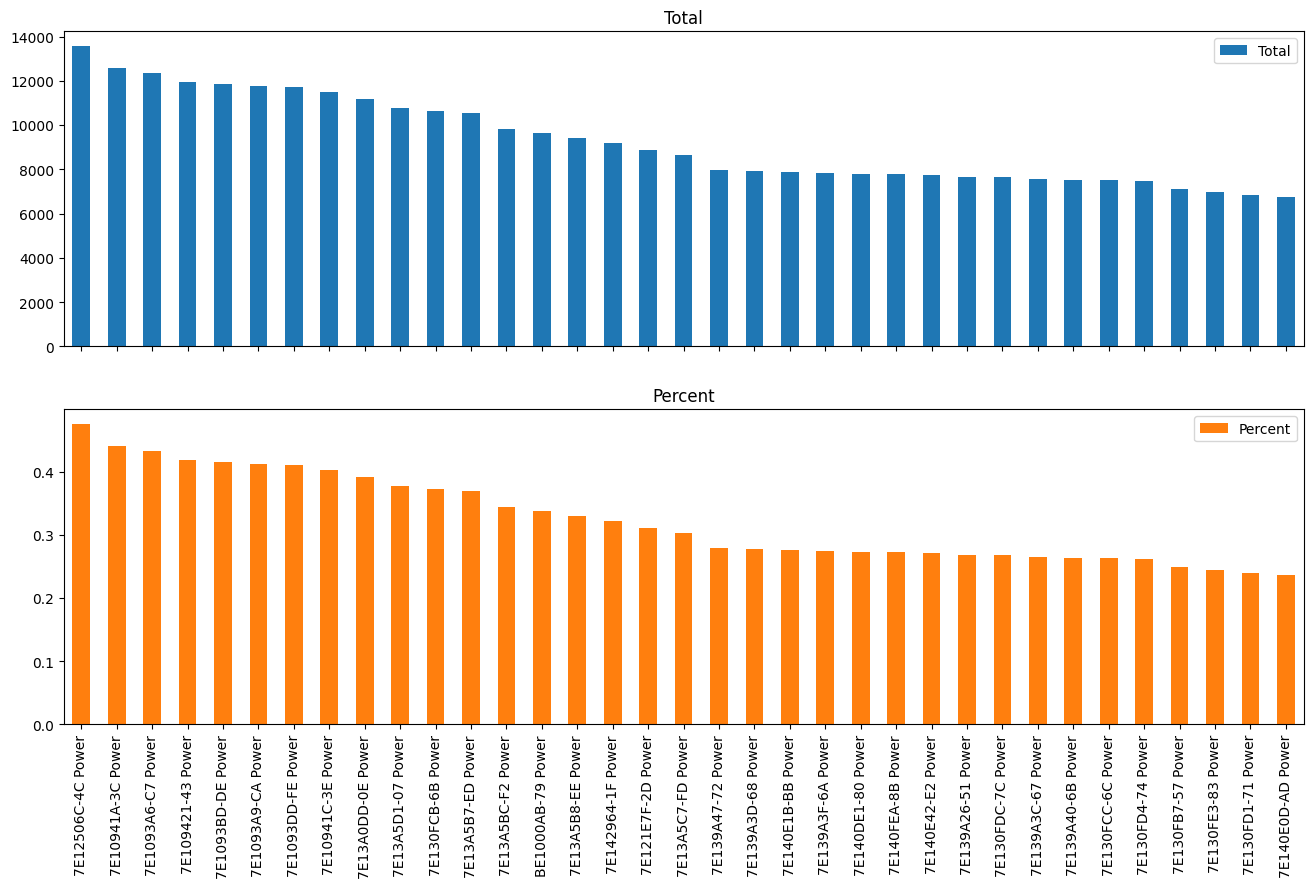

In [ ]:
#Function to plot missing values by column for each Inverter
def list_and_visualize_missing_data(dataset):
    # Listing total null items and its percent with respect to all nulls
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total > 0]

    missing_data.plot.bar(subplots=True, figsize=(16,9))

list_and_visualize_missing_data(y)

In [ ]:
#checking the index for being Time Series
y.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2023-04-04 14:00:00', '2023-04-04 15:00:00',
               '2023-04-04 16:00:00', '2023-04-04 17:00:00',
               '2023-04-04 18:00:00', '2023-04-04 19:00:00',
               '2023-04-04 20:00:00', '2023-04-04 21:00:00',
               '2023-04-04 22:00:00', '2023-04-04 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=28560, freq='60T')

In [ ]:
# read the Weather dataset
df_weather = pd.read_csv('/content/drive/MyDrive/solar/Watherhourly.csv', index_col='Time', parse_dates=['Time'])
df_weather.shape

(32782, 18)

In [ ]:
df_w = df_weather.copy()

In [ ]:
df_w.head()

,Temperature (C),Feels (C),Wind Speed (Kmph),Wind Dir Degree,Wind Dir 16 Point,Code,Description,Precip (MM),Humidity (%),Visibility (Km),Pressure (Mb),Cloud Cover (%),Heat Index (C),Dew Point (C),Wind Chill (C),Wind Guest (Kmph),UV Index,Icon Url
Time,,,,,,,,,,,,,,,,,,
2019-02-04 00:00:00,3,0,12,229,SW,266,Light drizzle,0.3,100,2,1013,100,3,3,0,39,1.0,http://cdn.worldweatheronline.com/images/wsymb...
2019-02-04 01:00:00,3,0,12,231,SW,266,Light drizzle,0.1,100,2,1013,100,3,3,0,37,1.0,http://cdn.worldweatheronline.com/images/wsymb...
2019-02-04 02:00:00,3,0,12,234,SW,266,Light drizzle,0.1,100,2,1013,100,3,3,0,34,1.0,http://cdn.worldweatheronline.com/images/wsymb...
2019-02-04 03:00:00,3,0,12,236,SW,266,Light drizzle,0.1,100,2,1013,100,3,3,0,32,1.0,http://cdn.worldweatheronline.com/images/wsymb...
2019-02-04 04:00:00,3,0,12,235,SW,266,Light drizzle,0.1,100,2,1013,100,3,3,0,30,1.0,http://cdn.worldweatheronline.com/images/wsymb...


In [ ]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32782 entries, 2019-02-04 00:00:00 to 2022-10-31 23:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature (C)    32782 non-null  int64  
 1   Feels (C)          32782 non-null  int64  
 2   Wind Speed (Kmph)  32782 non-null  int64  
 3   Wind Dir Degree    32782 non-null  int64  
 4   Wind Dir 16 Point  32782 non-null  object 
 5   Code               32782 non-null  int64  
 6   Description        32782 non-null  object 
 7   Precip (MM)        32782 non-null  float64
 8   Humidity (%)       32782 non-null  int64  
 9   Visibility (Km)    32782 non-null  int64  
 10  Pressure (Mb)      32782 non-null  int64  
 11  Cloud Cover (%)    32782 non-null  int64  
 12  Heat Index (C)     32782 non-null  int64  
 13  Dew Point (C)      32782 non-null  int64  
 14  Wind Chill (C)     32782 non-null  int64  
 15  Wind Guest (Kmph)  32782 non-null  

In [ ]:
df_w.drop([ "UV Index","Icon Url"] ,axis=1, inplace = True)

In [ ]:
df_w.index

DatetimeIndex(['2019-02-04 00:00:00', '2019-02-04 01:00:00',
               '2019-02-04 02:00:00', '2019-02-04 03:00:00',
               '2019-02-04 04:00:00', '2019-02-04 05:00:00',
               '2019-02-04 06:00:00', '2019-02-04 07:00:00',
               '2019-02-04 08:00:00', '2019-02-04 09:00:00',
               ...
               '2022-10-31 14:00:00', '2022-10-31 15:00:00',
               '2022-10-31 16:00:00', '2022-10-31 17:00:00',
               '2022-10-31 18:00:00', '2022-10-31 19:00:00',
               '2022-10-31 20:00:00', '2022-10-31 21:00:00',
               '2022-10-31 22:00:00', '2022-10-31 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=32782, freq=None)

In [ ]:
df_w.isin([0]).sum()

Temperature (C)       1267
Feels (C)              680
Wind Speed (Kmph)        1
Wind Dir Degree          4
Wind Dir 16 Point        0
Code                     0
Description              0
Precip (MM)          26075
Humidity (%)             0
Visibility (Km)        599
Pressure (Mb)            0
Cloud Cover (%)       1301
Heat Index (C)        1271
Dew Point (C)         1147
Wind Chill (C)         680
Wind Guest (Kmph)        1
dtype: int64

In [ ]:
df_w.isnull().sum()

Temperature (C)      0
Feels (C)            0
Wind Speed (Kmph)    0
Wind Dir Degree      0
Wind Dir 16 Point    0
Code                 0
Description          0
Precip (MM)          0
Humidity (%)         0
Visibility (Km)      0
Pressure (Mb)        0
Cloud Cover (%)      0
Heat Index (C)       0
Dew Point (C)        0
Wind Chill (C)       0
Wind Guest (Kmph)    0
dtype: int64

In [ ]:
df_w["Description"].value_counts()

Partly cloudy                          9203
Clear                                  3482
Overcast                               3348
Sunny                                  3085
Cloudy                                 1989
Patchy rain possible                   1945
Light rain shower                      1298
Heavy snow                              972
Mist                                    969
Blizzard                                744
Light rain                              684
Light drizzle                           656
Light snow                              639
Moderate rain                           495
Moderate snow                           465
Moderate or heavy rain shower           438
Blowing snow                            333
Fog                                     294
Moderate or heavy snow showers          237
Light snow showers                      216
Heavy rain                              153
Light sleet                             117
Freezing fog                    

In [ ]:
df_w["Wind Dir 16 Point"].value_counts()

WSW    3707
W      3388
SW     3321
WNW    3314
NW     3070
SSW    2542
E      2207
NNW    1890
ESE    1763
S      1494
ENE    1480
SSE    1198
SE     1087
NE     1014
NNE     804
N       503
Name: Wind Dir 16 Point, dtype: int64

Text(0, 0.5, 'Percent')

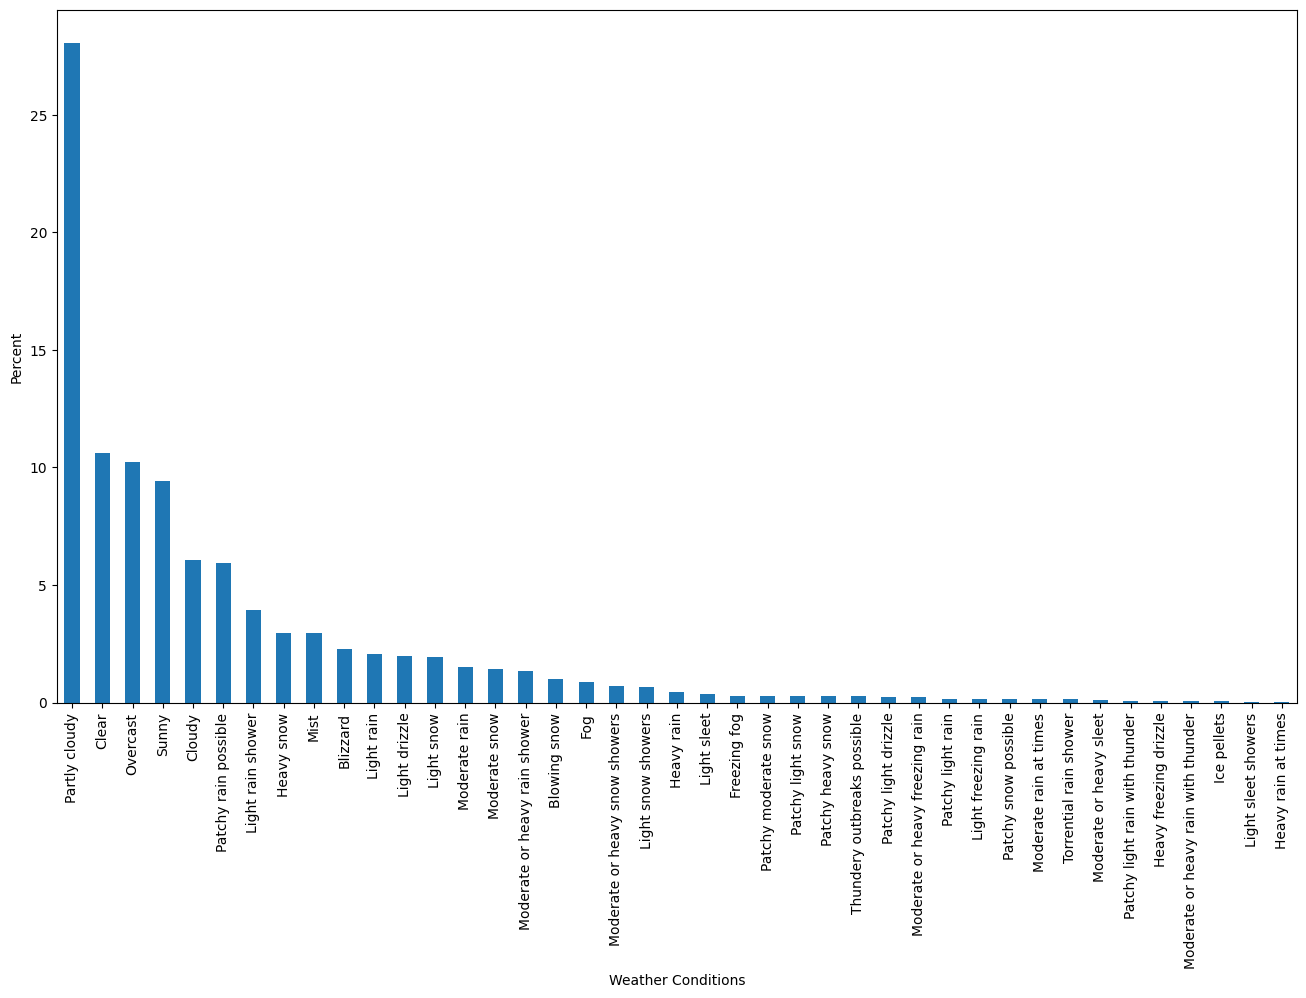

In [ ]:
weather_condition_ = (df_w["Description"].value_counts()/(df_w["Description"].value_counts().sum()))*100
weather_condition_.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_wind = label_encoder.fit_transform(df_w["Wind Dir 16 Point"])
df_w.drop("Wind Dir 16 Point", axis=1, inplace=True)
df_w["Wind Dir 16 Point"] = label_wind

In [ ]:
label_des = label_encoder.fit_transform(df_w["Description"])
df_w.drop("Description", axis=1, inplace=True)
df_w["Description"] = label_des

In [ ]:
df_w.shape

(32782, 16)

In [ ]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32782 entries, 2019-02-04 00:00:00 to 2022-10-31 23:00:00
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature (C)    32782 non-null  int64  
 1   Feels (C)          32782 non-null  int64  
 2   Wind Speed (Kmph)  32782 non-null  int64  
 3   Wind Dir Degree    32782 non-null  int64  
 4   Code               32782 non-null  int64  
 5   Precip (MM)        32782 non-null  float64
 6   Humidity (%)       32782 non-null  int64  
 7   Visibility (Km)    32782 non-null  int64  
 8   Pressure (Mb)      32782 non-null  int64  
 9   Cloud Cover (%)    32782 non-null  int64  
 10  Heat Index (C)     32782 non-null  int64  
 11  Dew Point (C)      32782 non-null  int64  
 12  Wind Chill (C)     32782 non-null  int64  
 13  Wind Guest (Kmph)  32782 non-null  int64  
 14  Wind Dir 16 Point  32782 non-null  int64  
 15  Description        32782 non-null  

In [ ]:
y.dropna(inplace=True)

In [ ]:
y.isna().sum()

7E13A5B8-EE Power    0
7E13A5D1-07 Power    0
7E13A5B7-ED Power    0
7E13A5C7-FD Power    0
7E13A0DD-0E Power    0
7E13A5BC-F2 Power    0
7E142964-1F Power    0
7E12506C-4C Power    0
7E109421-43 Power    0
7E1093DD-FE Power    0
7E1093A6-C7 Power    0
7E1093BD-DE Power    0
7E10941C-3E Power    0
7E10941A-3C Power    0
7E1093A9-CA Power    0
7E121E7F-2D Power    0
7E130FDC-7C Power    0
7E140DE1-80 Power    0
7E140FEA-8B Power    0
7E140E0D-AD Power    0
7E140E1B-BB Power    0
7E140E42-E2 Power    0
BE1000AB-79 Power    0
7E130FB7-57 Power    0
7E130FCC-6C Power    0
7E139A3C-67 Power    0
7E130FCB-6B Power    0
7E130FE3-83 Power    0
7E130FD1-71 Power    0
7E139A26-51 Power    0
7E139A40-6B Power    0
7E139A47-72 Power    0
7E139A3D-68 Power    0
7E139A3F-6A Power    0
7E130FD4-74 Power    0
dtype: int64

In [ ]:
df_w.isna().sum()

Temperature (C)      0
Feels (C)            0
Wind Speed (Kmph)    0
Wind Dir Degree      0
Code                 0
Precip (MM)          0
Humidity (%)         0
Visibility (Km)      0
Pressure (Mb)        0
Cloud Cover (%)      0
Heat Index (C)       0
Dew Point (C)        0
Wind Chill (C)       0
Wind Guest (Kmph)    0
Wind Dir 16 Point    0
Description          0
dtype: int64

# Detecting Outliers using Tukey's method

In [ ]:
#Detecting Outliers for the resampled dataset
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []


    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

lof = df_w.columns
# params dataset, number of outliers for rejection, list of features
#select observations containing more than 5 outliers
Outliers_to_drop = detect_outliers(df_w, 5, lof)

In [ ]:
len(Outliers_to_drop)

0

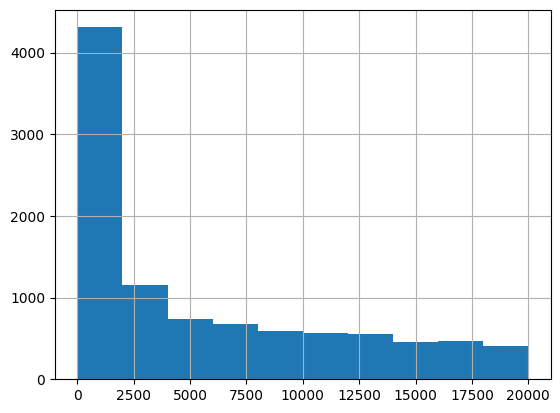

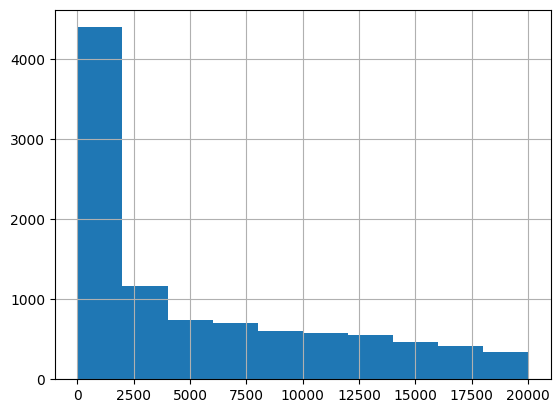

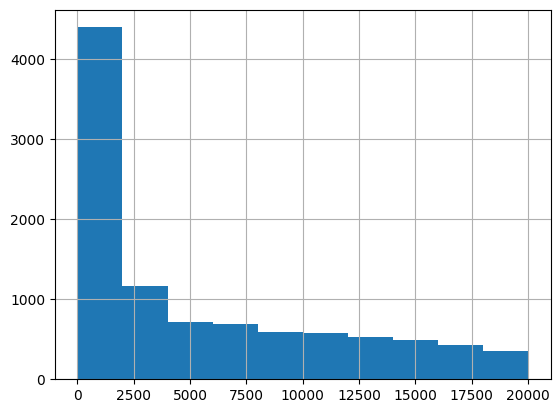

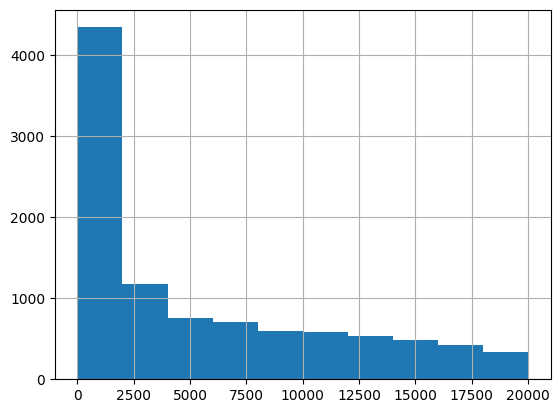

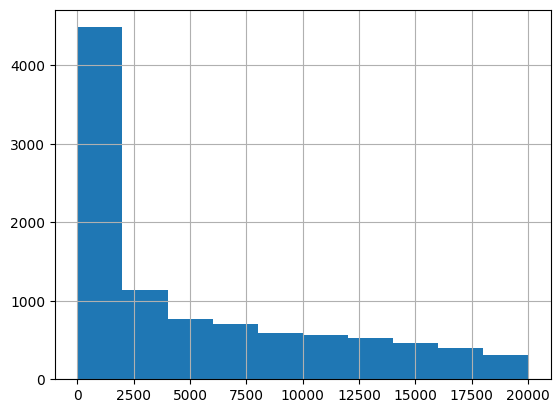

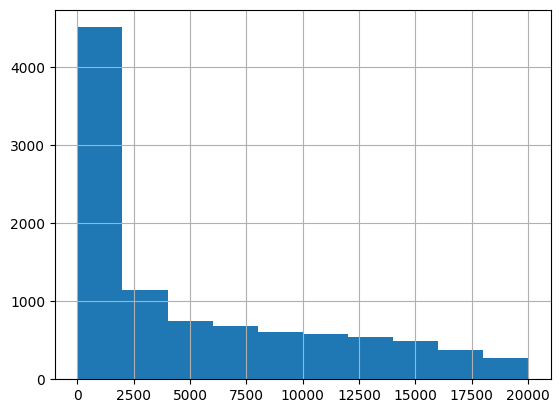

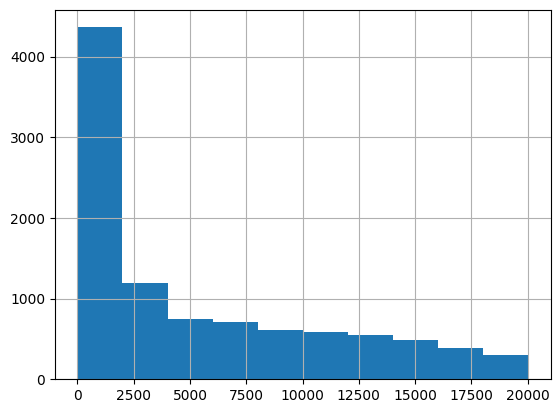

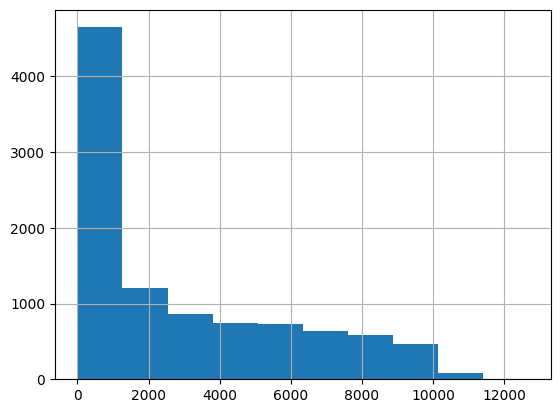

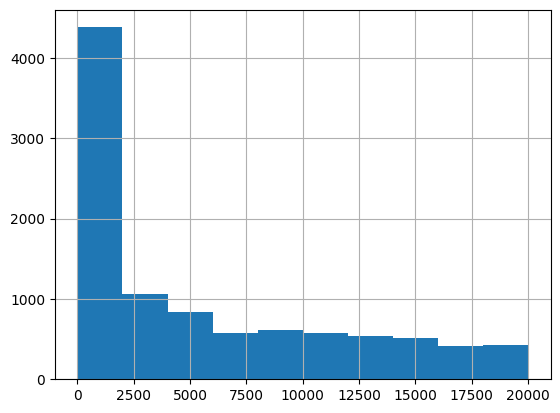

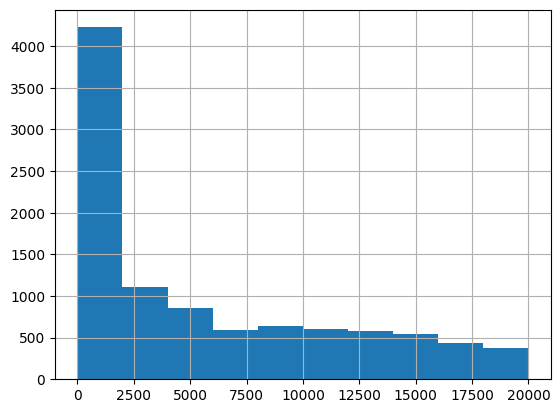

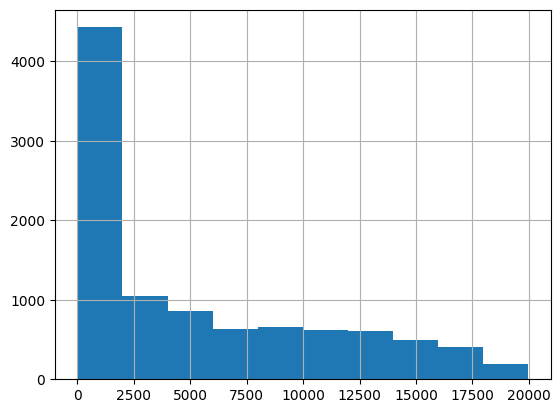

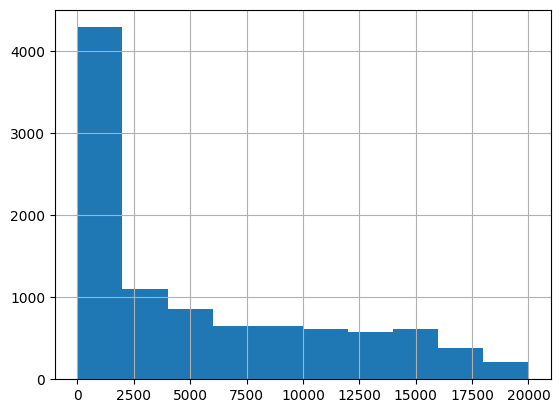

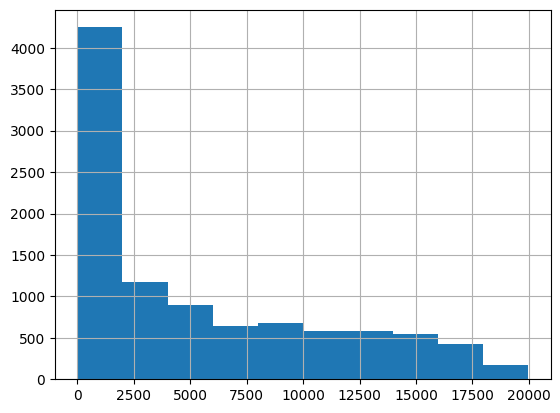

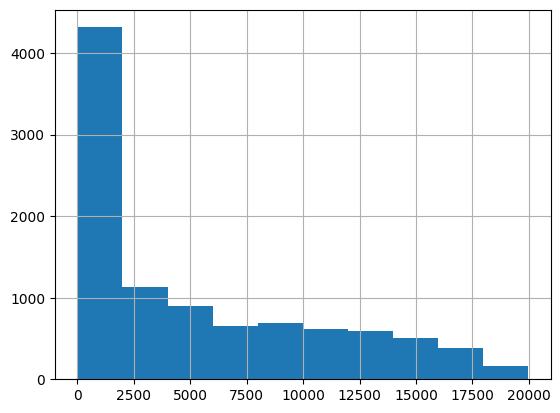

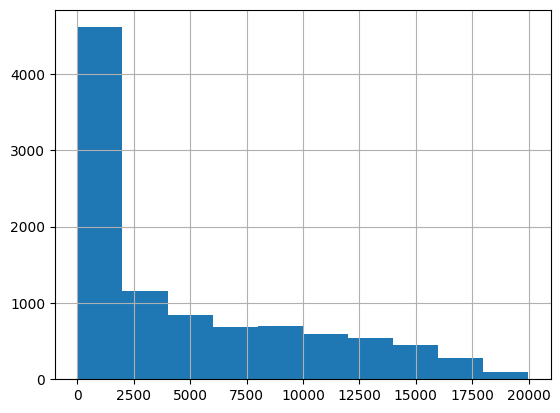

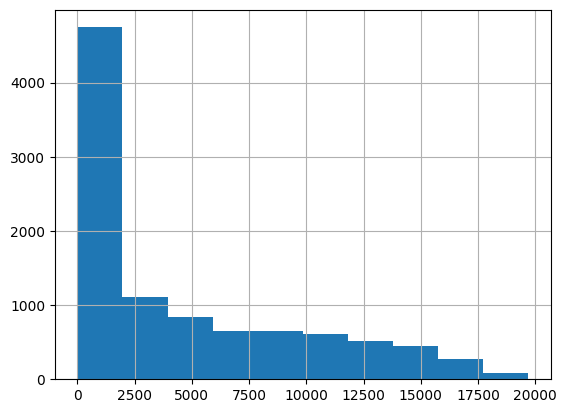

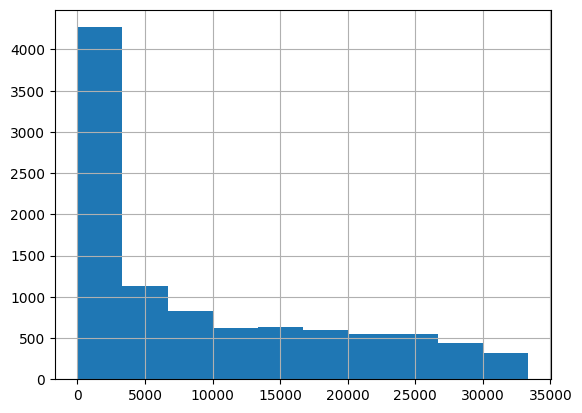

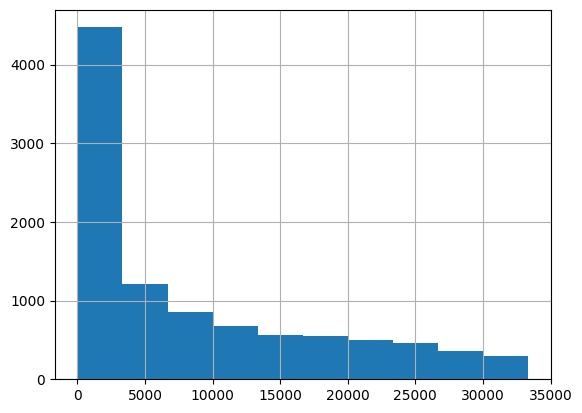

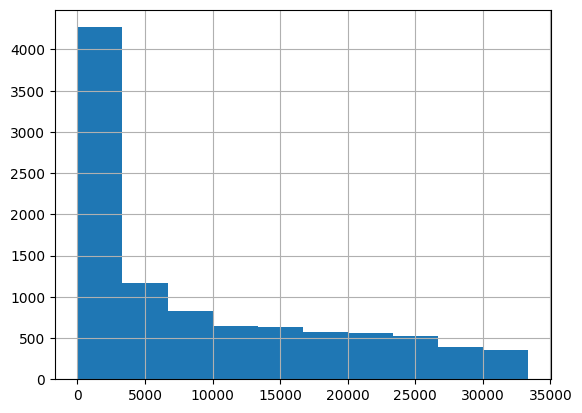

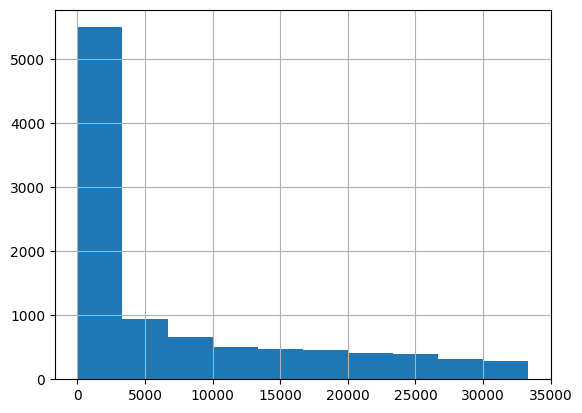

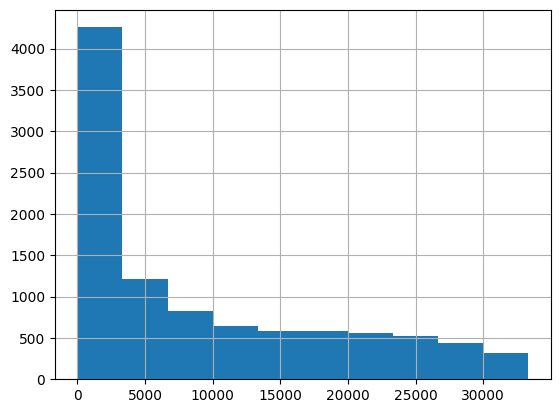

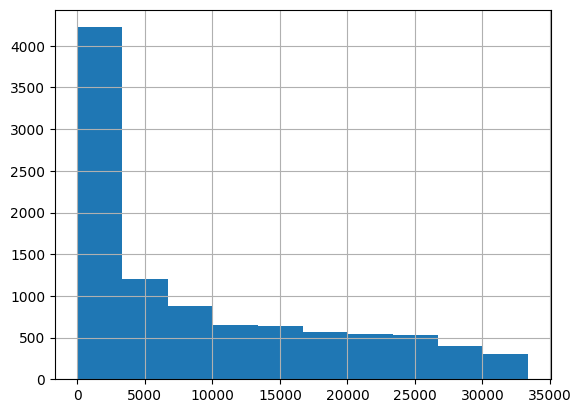

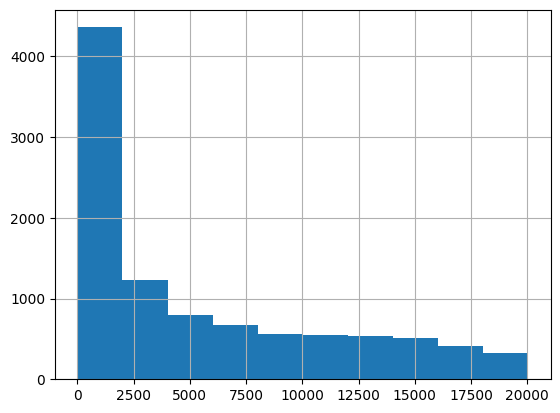

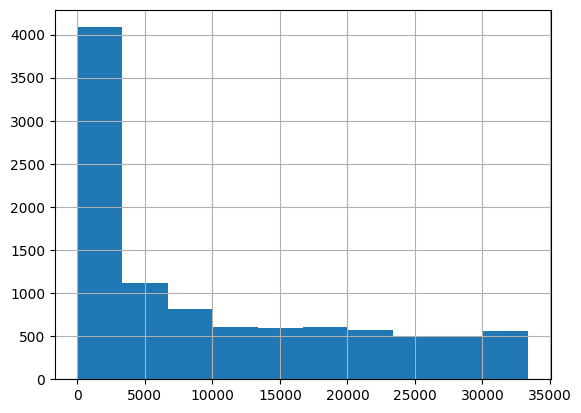

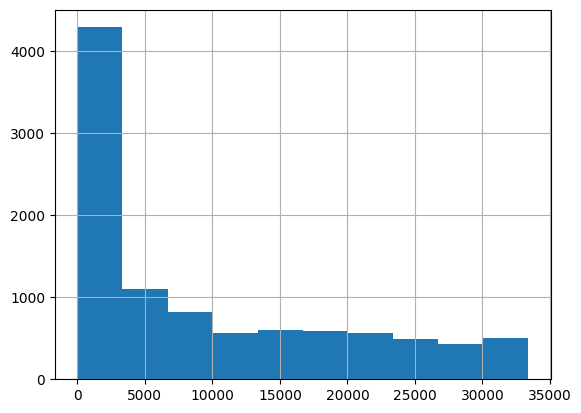

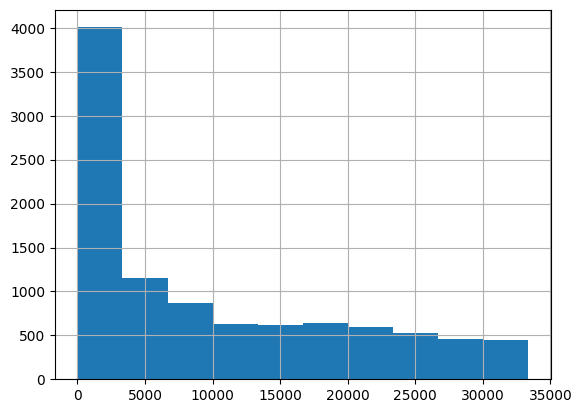

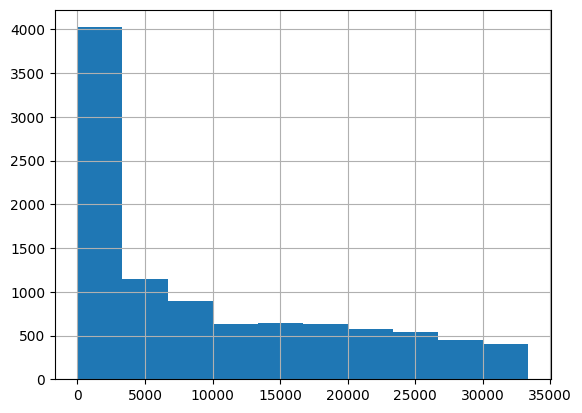

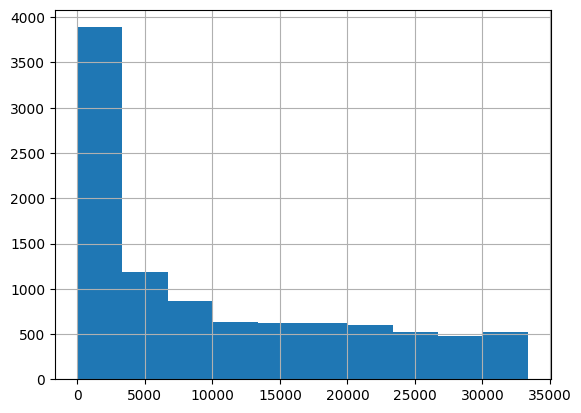

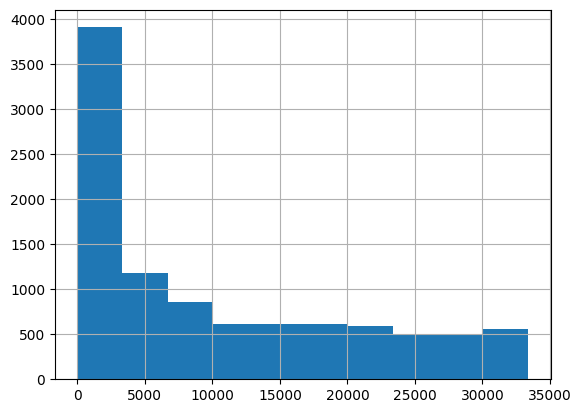

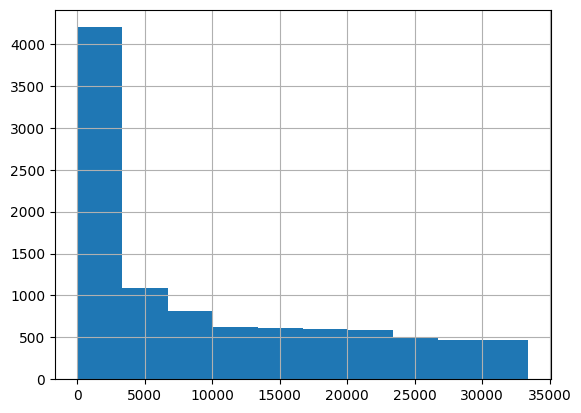

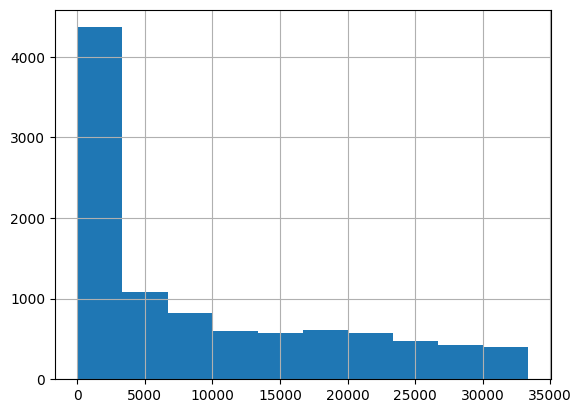

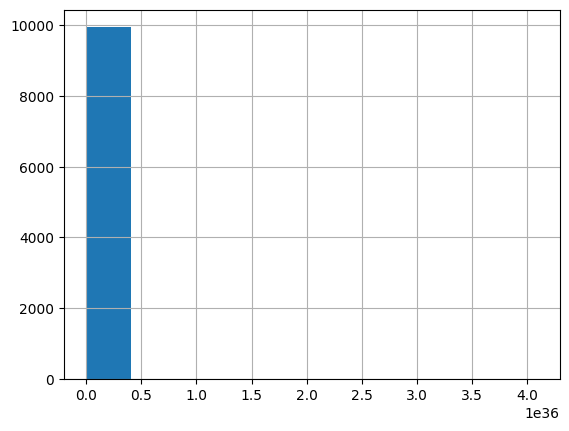

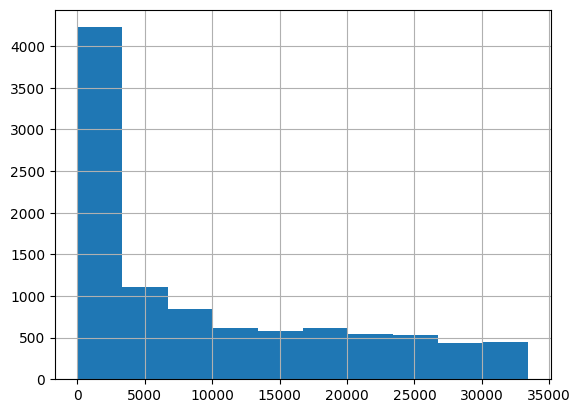

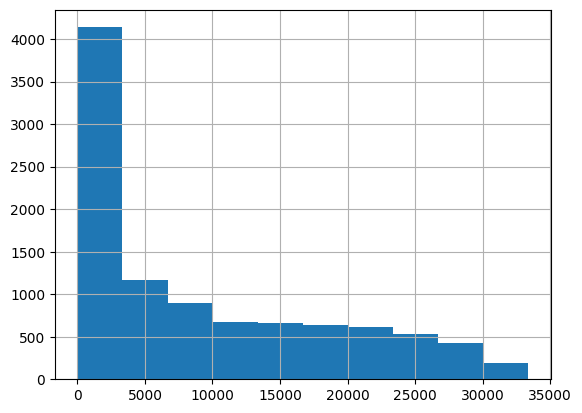

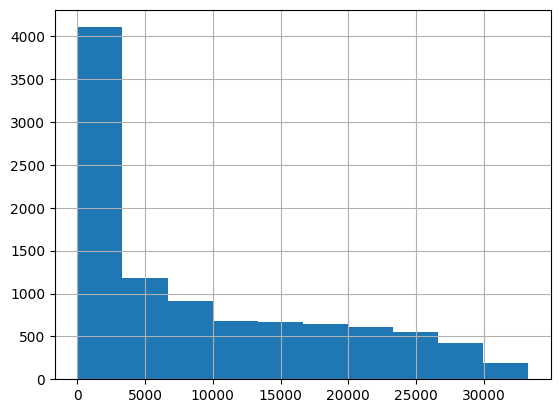

In [ ]:
for column in y:
    plt.figure()
    y[column].hist()
    plt.show()

* Let's check the solar of 7E139A47-72

In [ ]:
y["7E139A47-72 Power"].describe()

count    9.941000e+03
mean     4.111709e+32
std      4.099562e+34
min      0.000000e+00
25%      7.831667e+02
50%      5.862083e+03
75%      1.776833e+04
max      4.087450e+36
Name: 7E139A47-72 Power, dtype: float64

<Axes: >

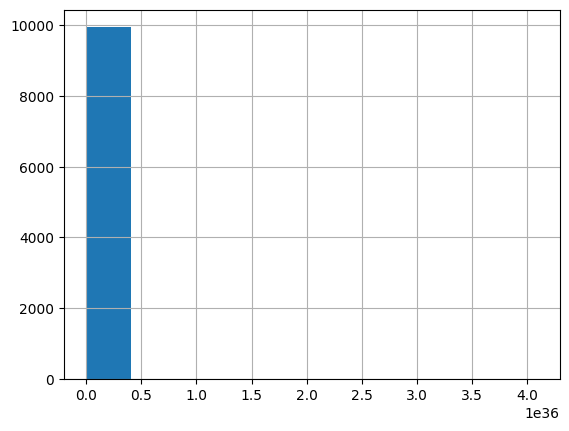

In [ ]:

y["7E139A47-72 Power"].hist()

* *Remove the solar of 7E139A47-72*

In [ ]:
y.drop("7E139A47-72 Power", axis=1,inplace= True)

In [ ]:
y.shape

(9941, 34)

In [ ]:
print(df_w.shape , y.shape )

(32782, 16) (9941, 34)


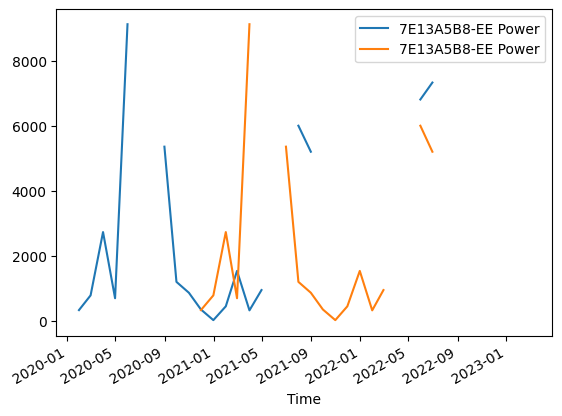

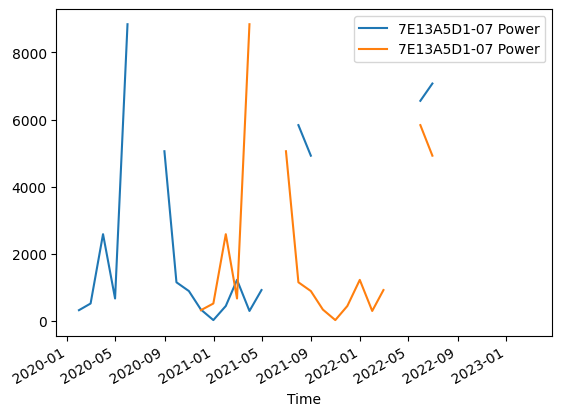

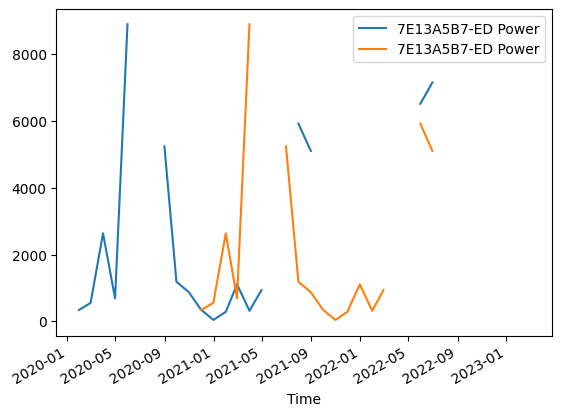

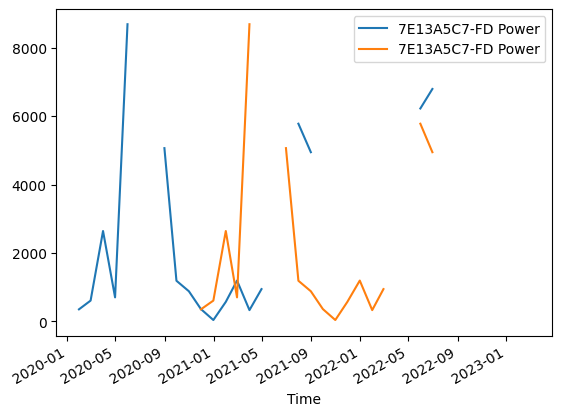

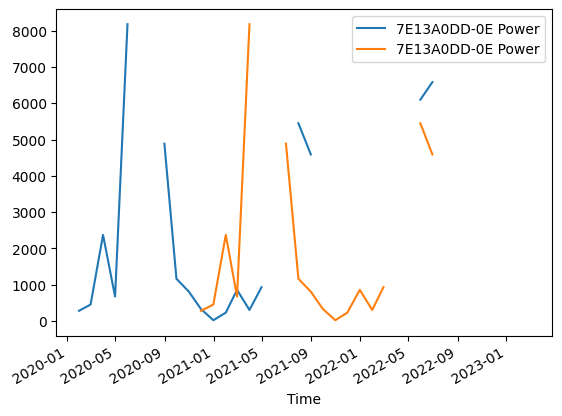

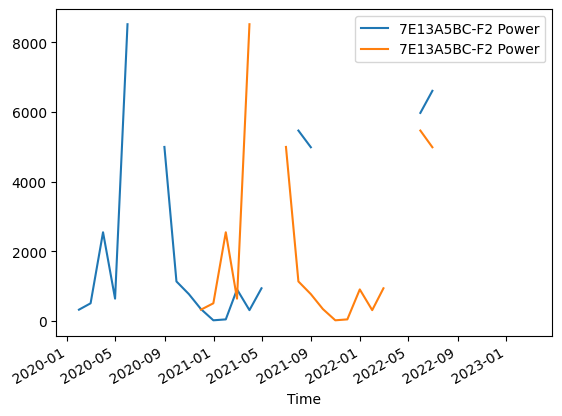

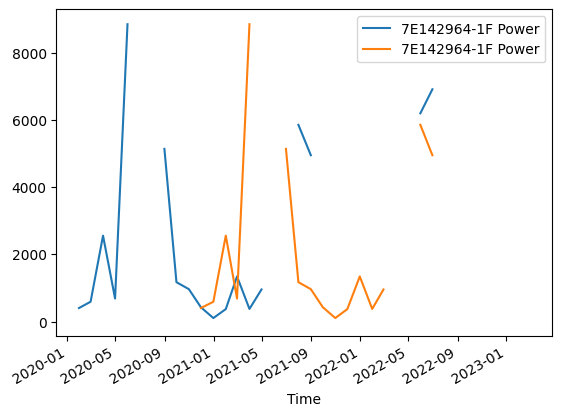

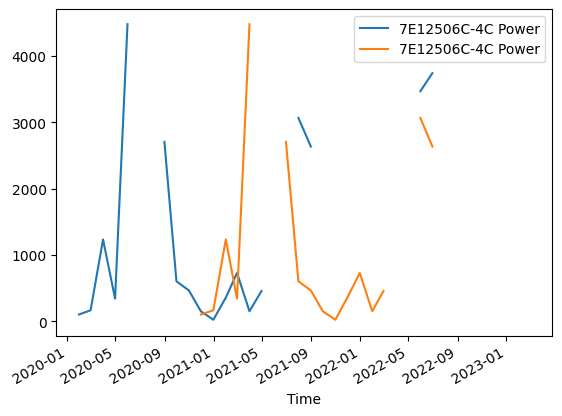

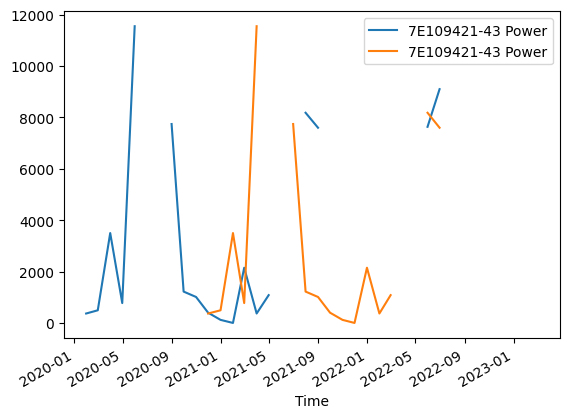

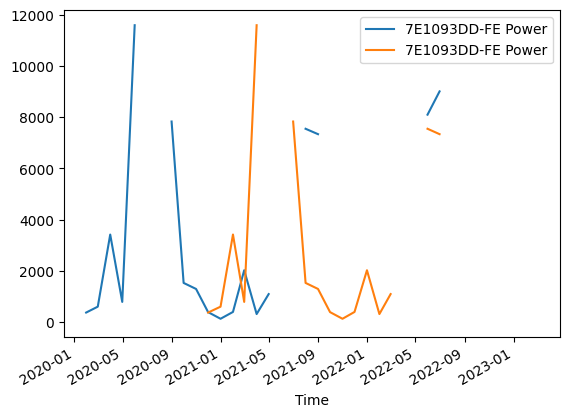

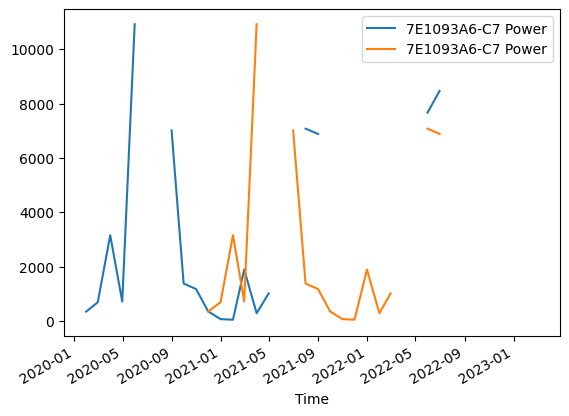

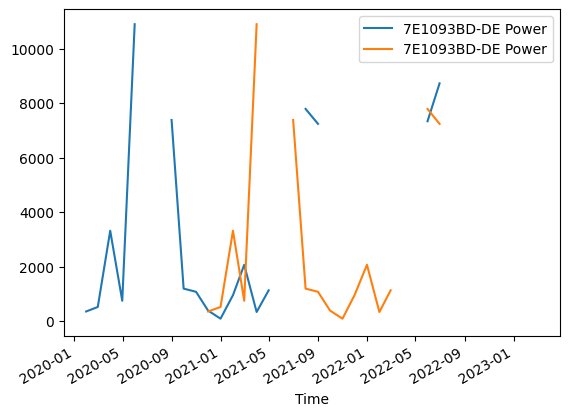

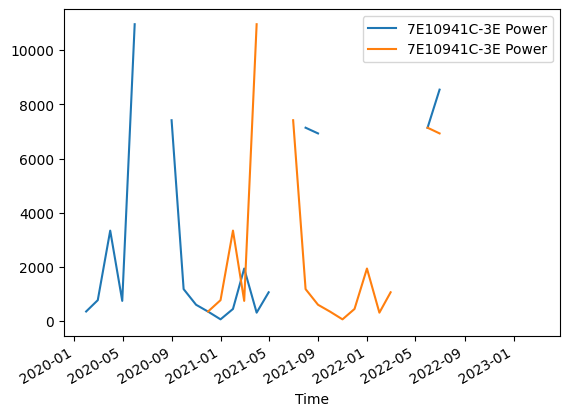

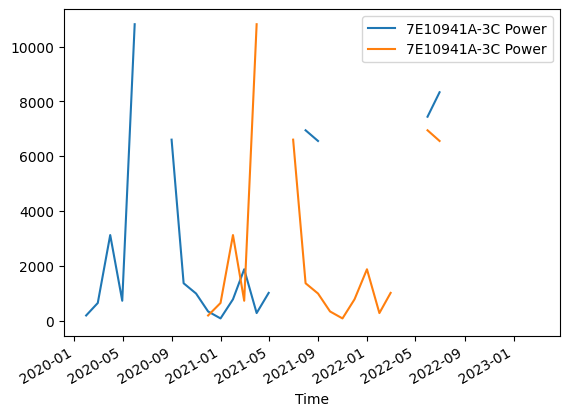

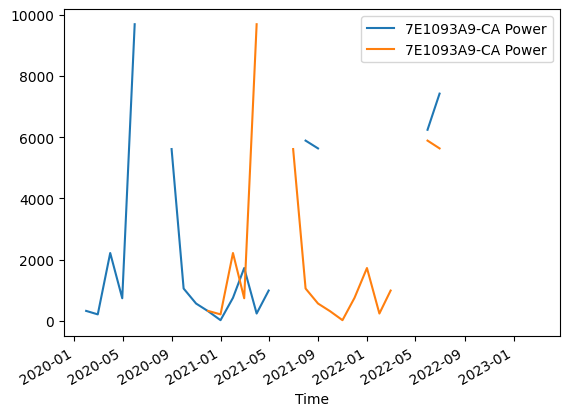

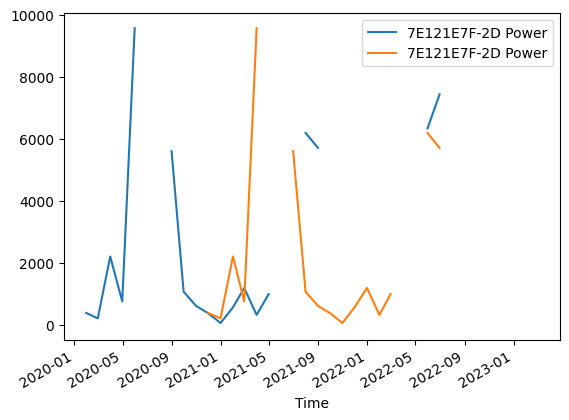

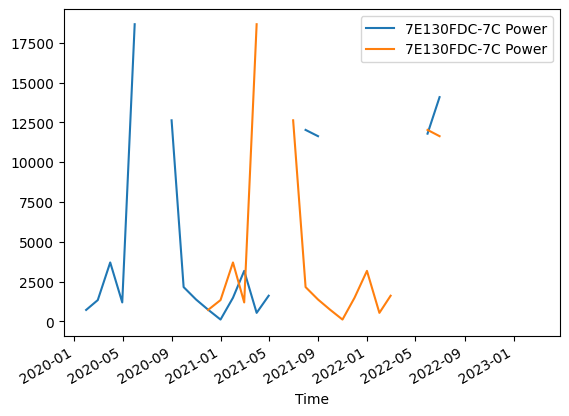

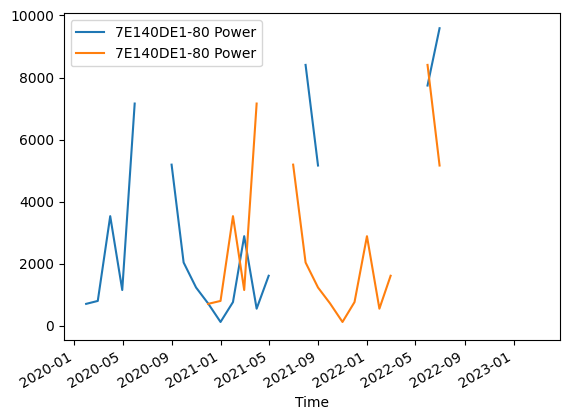

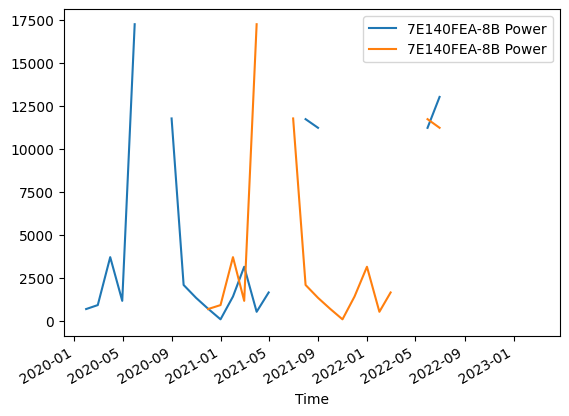

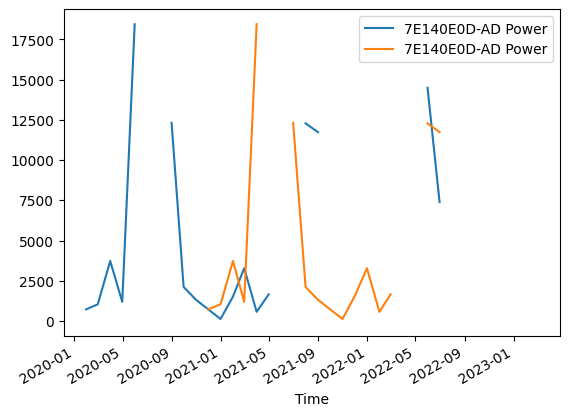

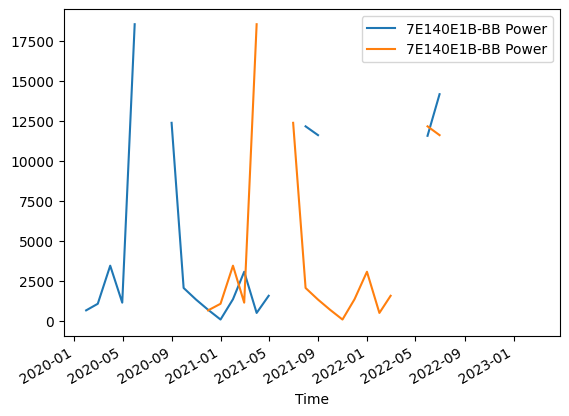

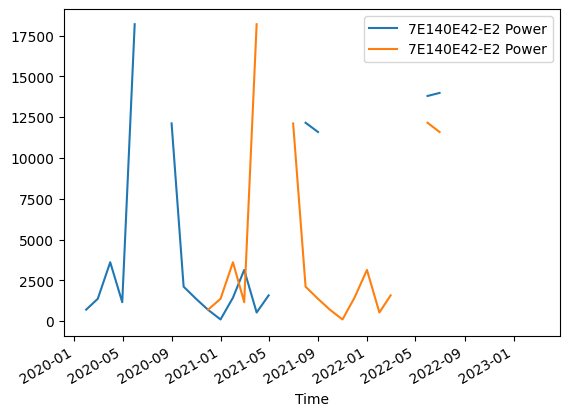

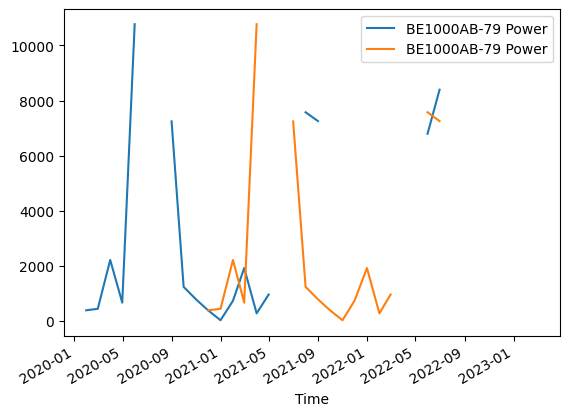

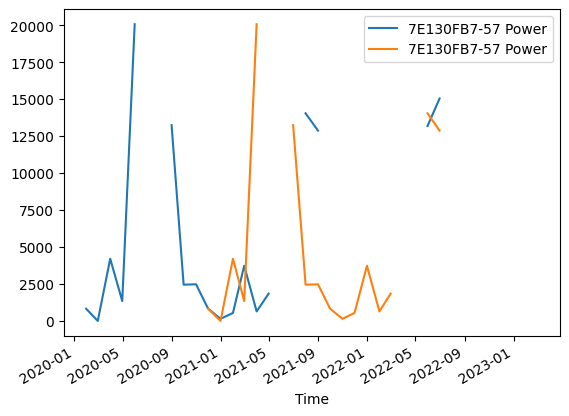

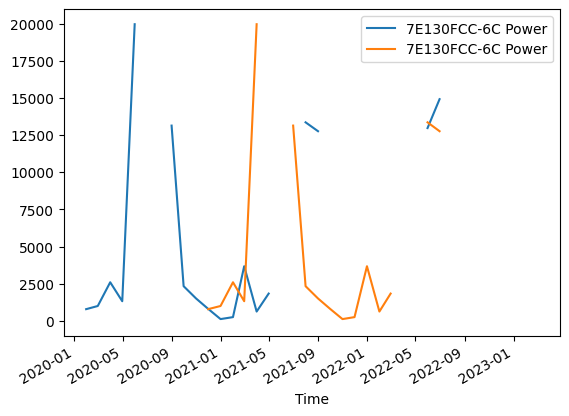

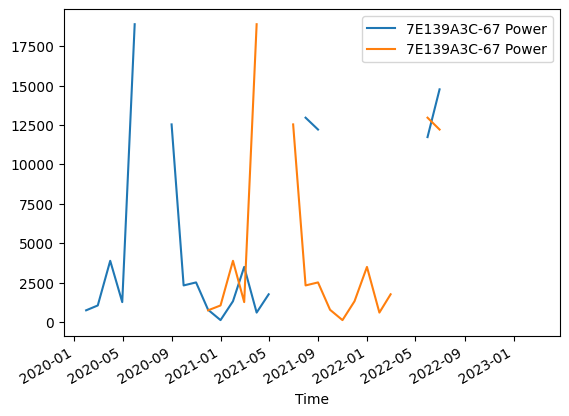

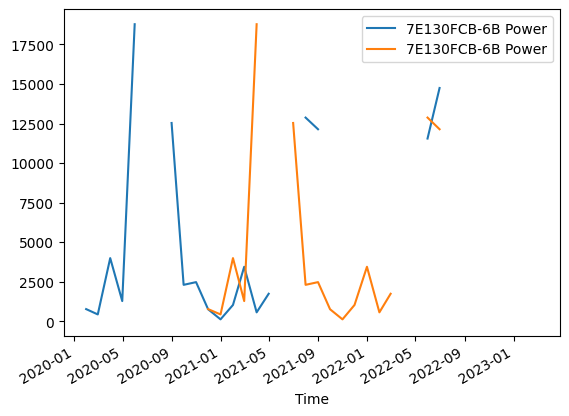

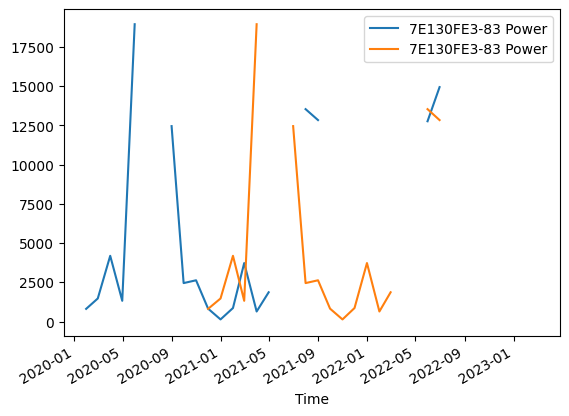

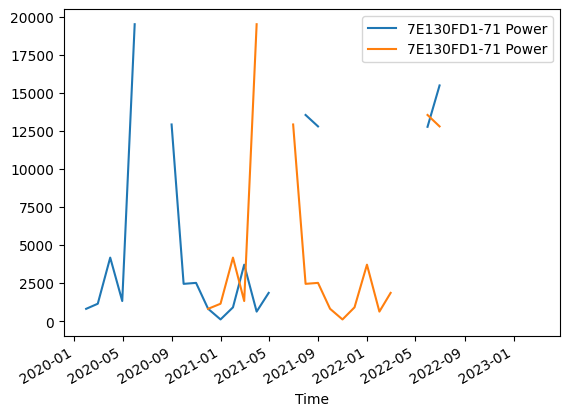

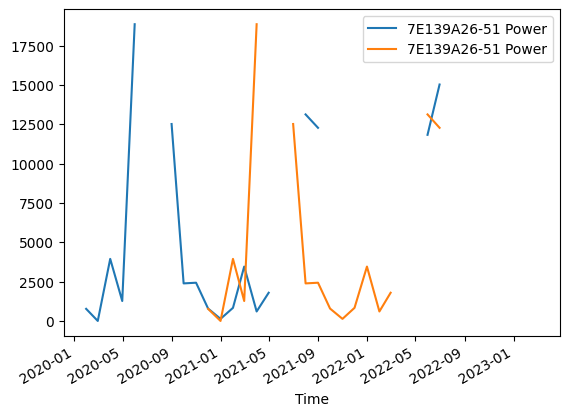

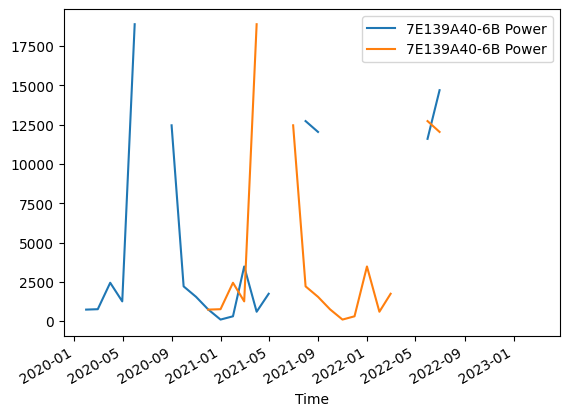

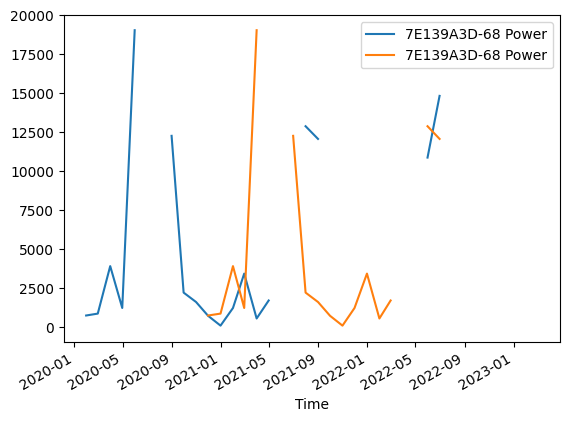

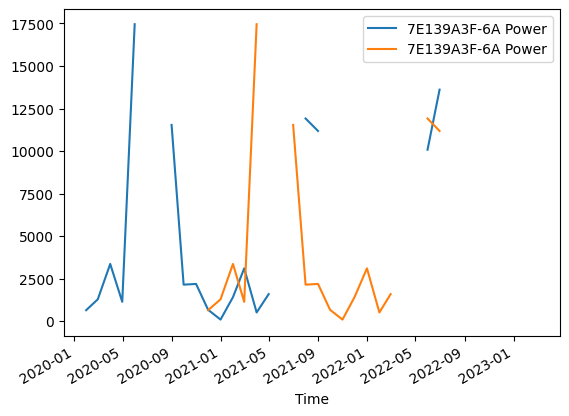

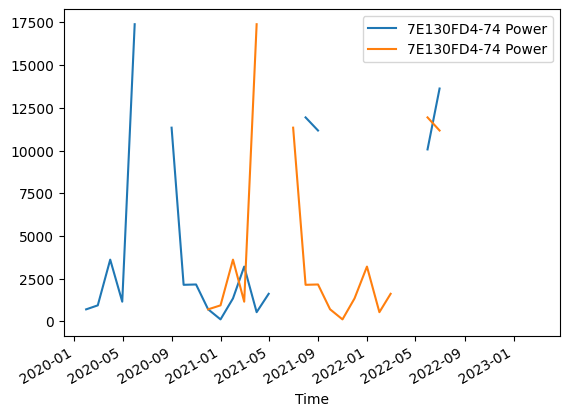

In [ ]:
for column in y:
    plt.figure()
    y[column].asfreq('M').plot(legend=True)
    shifted = y[column].asfreq('M').shift(10).plot(legend=True)
    plt.show()

In [ ]:
final_df = pd.merge(df_w, y, left_index=True, right_index=True)

In [ ]:
final_df.shape

(8560, 50)

In [ ]:
x_weather = final_df.iloc[:,:16]
y_final = final_df.iloc[:,16:]

In [ ]:
y_final = y_final + 0.01

# apply Box-Cox transformation
for i in range(y_final.shape[1]):
    y_final.iloc[:, i], fitted_lambda = stats.boxcox(y_final.iloc[:, i])

In [ ]:
#Split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x_weather, y_final, test_size = 0.2 ,shuffle=False)

In [ ]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(6848, 16) (1712, 16) (6848, 34) (1712, 34)


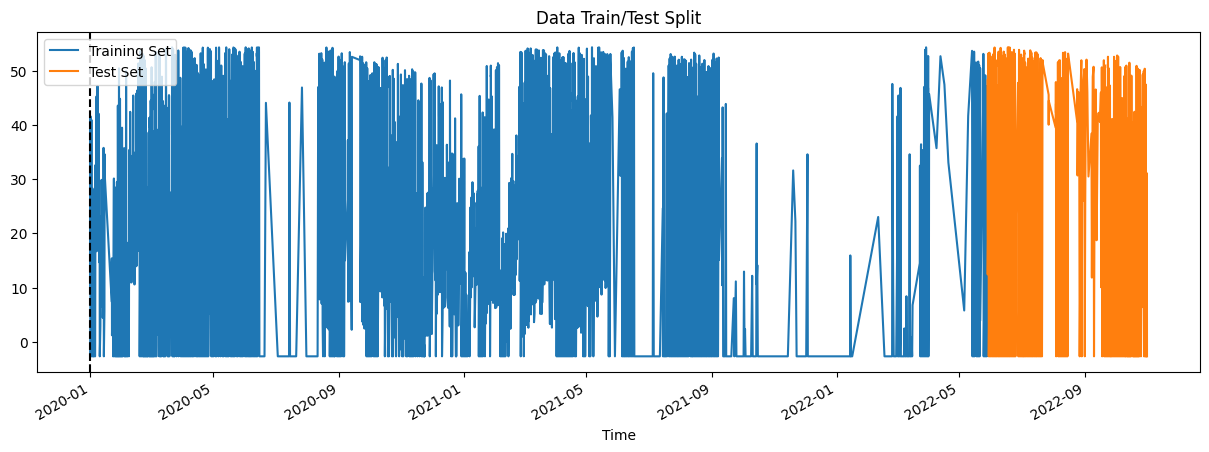

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train['7E130FDC-7C Power'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
y_test['7E130FDC-7C Power'].plot(ax=ax, label='Test Set')
ax.axvline('01-01-2020', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# GB Regression

In [ ]:
# Fit the model and make predictions
y_pred = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(x_train, y_train).predict(x_test)

column_names = list(y.columns)

# Convert y_test and y_pred to NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)


# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 75.116
7E13A5D1-07 Power: 71.447
7E13A5B7-ED Power: 69.614
7E13A5C7-FD Power: 73.265
7E13A0DD-0E Power: 65.618
7E13A5BC-F2 Power: 63.229
7E142964-1F Power: 74.164
7E12506C-4C Power: 63.704
7E109421-43 Power: 70.612
7E1093DD-FE Power: 85.246
7E1093A6-C7 Power: 70.726
7E1093BD-DE Power: 79.635
7E10941C-3E Power: 83.706
7E10941A-3C Power: 83.644
7E1093A9-CA Power: 61.161
7E121E7F-2D Power: 63.170
7E130FDC-7C Power: 112.770
7E140DE1-80 Power: 100.782
7E140FEA-8B Power: 111.430
7E140E0D-AD Power: 324.784
7E140E1B-BB Power: 113.722
7E140E42-E2 Power: 122.583
BE1000AB-79 Power: 88.555
7E130FB7-57 Power: 114.397
7E130FCC-6C Power: 103.335
7E139A3C-67 Power: 130.910
7E130FCB-6B Power: 122.301
7E130FE3-83 Power: 146.378
7E130FD1-71 Power: 133.726
7E139A26-51 Power: 106.647
7E139A40-6B Power: 96.554
7E139A3D-68 Power: 105.883
7E139A3F-6A Power: 126.774
7E130FD4-74 Power: 123.722
Average MSE: 101.156


# XGB Regression

In [ ]:
xgb = XGBRegressor()
model = MultiOutputRegressor(xgb)
model.fit(x_train, y_train)
y_pred_xgb = model.predict(x_test)
# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred_xgb[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 85.640
7E13A5D1-07 Power: 79.918
7E13A5B7-ED Power: 78.685
7E13A5C7-FD Power: 82.227
7E13A0DD-0E Power: 74.742
7E13A5BC-F2 Power: 70.650
7E142964-1F Power: 84.898
7E12506C-4C Power: 68.867
7E109421-43 Power: 79.213
7E1093DD-FE Power: 100.895
7E1093A6-C7 Power: 82.048
7E1093BD-DE Power: 88.837
7E10941C-3E Power: 100.977
7E10941A-3C Power: 96.252
7E1093A9-CA Power: 72.567
7E121E7F-2D Power: 71.007
7E130FDC-7C Power: 131.403
7E140DE1-80 Power: 110.785
7E140FEA-8B Power: 129.258
7E140E0D-AD Power: 304.762
7E140E1B-BB Power: 126.973
7E140E42-E2 Power: 133.302
BE1000AB-79 Power: 99.160
7E130FB7-57 Power: 131.819
7E130FCC-6C Power: 122.334
7E139A3C-67 Power: 144.722
7E130FCB-6B Power: 135.295
7E130FE3-83 Power: 165.137
7E130FD1-71 Power: 161.240
7E139A26-51 Power: 124.531
7E139A40-6B Power: 114.681
7E139A3D-68 Power: 114.092
7E139A3F-6A Power: 146.214
7E130FD4-74 Power: 142.085
Average MSE: 113.389


# MultiOutputRegressor RandomForest

In [ ]:
max_depth = 10
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth,  min_samples_leaf = 15, ccp_alpha = 0.01,random_state=0)
)
regr_multirf.fit(x_train, y_train)
# Predict on new data
y_multirf = regr_multirf.predict(x_test)
mse_per_column = []
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_multirf[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 103.279
7E13A5D1-07 Power: 95.074
7E13A5B7-ED Power: 92.441
7E13A5C7-FD Power: 98.647
7E13A0DD-0E Power: 87.256
7E13A5BC-F2 Power: 81.914
7E142964-1F Power: 96.239
7E12506C-4C Power: 81.184
7E109421-43 Power: 88.816
7E1093DD-FE Power: 110.584
7E1093A6-C7 Power: 94.182
7E1093BD-DE Power: 101.796
7E10941C-3E Power: 105.147
7E10941A-3C Power: 108.106
7E1093A9-CA Power: 79.448
7E121E7F-2D Power: 82.983
7E130FDC-7C Power: 141.912
7E140DE1-80 Power: 130.943
7E140FEA-8B Power: 140.839
7E140E0D-AD Power: 329.244
7E140E1B-BB Power: 139.319
7E140E42-E2 Power: 148.030
BE1000AB-79 Power: 105.502
7E130FB7-57 Power: 147.495
7E130FCC-6C Power: 131.818
7E139A3C-67 Power: 150.261
7E130FCB-6B Power: 160.578
7E130FE3-83 Power: 179.860
7E130FD1-71 Power: 165.552
7E139A26-51 Power: 129.136
7E139A40-6B Power: 120.592
7E139A3D-68 Power: 134.089
7E139A3F-6A Power: 155.273
7E130FD4-74 Power: 155.690
Average MSE: 125.683


# RandomForestRegressor

In [ ]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,  min_samples_leaf = 15, ccp_alpha = 0.01, random_state=2)
regr_rf.fit(x_train, y_train)
y_rf = regr_rf.predict(x_test)
mse_per_column = []
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_rf[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 96.243
7E13A5D1-07 Power: 89.722
7E13A5B7-ED Power: 88.586
7E13A5C7-FD Power: 93.029
7E13A0DD-0E Power: 82.443
7E13A5BC-F2 Power: 80.066
7E142964-1F Power: 94.727
7E12506C-4C Power: 76.969
7E109421-43 Power: 88.746
7E1093DD-FE Power: 107.198
7E1093A6-C7 Power: 91.022
7E1093BD-DE Power: 101.030
7E10941C-3E Power: 105.623
7E10941A-3C Power: 105.476
7E1093A9-CA Power: 78.188
7E121E7F-2D Power: 81.807
7E130FDC-7C Power: 143.375
7E140DE1-80 Power: 125.452
7E140FEA-8B Power: 140.443
7E140E0D-AD Power: 341.233
7E140E1B-BB Power: 142.963
7E140E42-E2 Power: 151.976
BE1000AB-79 Power: 109.041
7E130FB7-57 Power: 146.295
7E130FCC-6C Power: 131.719
7E139A3C-67 Power: 160.106
7E130FCB-6B Power: 156.650
7E130FE3-83 Power: 180.977
7E130FD1-71 Power: 170.438
7E139A26-51 Power: 133.701
7E139A40-6B Power: 123.541
7E139A3D-68 Power: 133.614
7E139A3F-6A Power: 158.250
7E130FD4-74 Power: 156.791
Average MSE: 125.513



* MultiOutputRegressor fits one random forest for each target. Each tree inside then is predicting one of your outputs.

Without the wrapper, RandomForestRegressor fits trees targeting all the outputs at once. The split criteria are based on the average impurity reduction across the outputs.

# ensemble method

In [ ]:
from sklearn.svm import SVR
# Train additional base models
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train, y_train)

svr = MultiOutputRegressor(SVR())
svr.fit(x_train, y_train)

gb =  MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
gb.fit(x_train, y_train)

# Combine predictions using a meta-model
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()
meta_features = np.hstack([gb.predict(x_train), rf.predict(x_train), svr.predict(x_train)])
meta_model.fit(meta_features, y_train)

# Make predictions using the meta-model
meta_features_test = np.hstack([gb.predict(x_test), rf.predict(x_test), svr.predict(x_test)])
y_pred_ensemble = meta_model.predict(meta_features_test)

# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred_ensemble[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))


MSE per column:
7E13A5B8-EE Power: 96.431
7E13A5D1-07 Power: 89.757
7E13A5B7-ED Power: 89.619
7E13A5C7-FD Power: 92.288
7E13A0DD-0E Power: 82.475
7E13A5BC-F2 Power: 79.866
7E142964-1F Power: 94.729
7E12506C-4C Power: 76.600
7E109421-43 Power: 90.824
7E1093DD-FE Power: 107.629
7E1093A6-C7 Power: 92.071
7E1093BD-DE Power: 101.133
7E10941C-3E Power: 107.575
7E10941A-3C Power: 106.488
7E1093A9-CA Power: 79.267
7E121E7F-2D Power: 80.927
7E130FDC-7C Power: 143.856
7E140DE1-80 Power: 124.949
7E140FEA-8B Power: 139.698
7E140E0D-AD Power: 304.085
7E140E1B-BB Power: 143.191
7E140E42-E2 Power: 151.454
BE1000AB-79 Power: 108.757
7E130FB7-57 Power: 145.853
7E130FCC-6C Power: 132.379
7E139A3C-67 Power: 162.496
7E130FCB-6B Power: 158.359
7E130FE3-83 Power: 180.787
7E130FD1-71 Power: 176.127
7E139A26-51 Power: 134.237
7E139A40-6B Power: 125.078
7E139A3D-68 Power: 134.598
7E139A3F-6A Power: 158.575
7E130FD4-74 Power: 157.548
Average MSE: 124.991


# Deep Neural Network
# First Approach

In [ ]:
# Convert DataFrame objects to NumPy arrays
y_train_arr = y_train.to_numpy()
y_test_arr = y_test

# Reshape the input data
x_train_r = x_train.reshape((6848, 16, 1))
x_test_r = x_test.reshape((1712, 16, 1))

# Reshape the output data
y_train_r = y_train_arr.reshape((6848, 34))
y_test_r = y_test_arr.reshape((1712, 34))

# CNN-LSTM

## Model 1

In [ ]:
config = tf.compat.v1.ConfigProto(device_count={'GPU': 1})
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)
#difine MSE Function
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(16, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(34, activation='linear'))

# Define the optimizer with a custom learning rate
my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model with the custom optimizer and the desired loss function
model.compile(optimizer=my_optimizer, loss='mse',metrics=[mse])

# Train the model on x_train and y_train
history = model.fit(x_train_r, y_train_r, epochs=50, validation_split=0.2 , batch_size=32)

# Evaluate the model on x_test and y_test
mse  = model.evaluate(x_test_r, y_test_r)
print(f'Test loss: {mse}')


Epoch 1/50
172/172 [==============================] - 11s 15ms/step - loss: 316.9794 - mse: 316.9794 - val_loss: 329.4595 - val_mse: 329.4595
Epoch 2/50
172/172 [==============================] - 1s 9ms/step - loss: 184.6296 - mse: 184.6296 - val_loss: 276.1551 - val_mse: 276.1551
Epoch 3/50
172/172 [==============================] - 1s 9ms/step - loss: 177.0406 - mse: 177.0406 - val_loss: 254.6198 - val_mse: 254.6198
Epoch 4/50
172/172 [==============================] - 1s 9ms/step - loss: 172.1586 - mse: 172.1586 - val_loss: 251.9970 - val_mse: 251.9970
Epoch 5/50
172/172 [==============================] - 1s 9ms/step - loss: 167.9880 - mse: 167.9880 - val_loss: 361.2714 - val_mse: 361.2714
Epoch 6/50
172/172 [==============================] - 1s 9ms/step - loss: 165.8222 - mse: 165.8222 - val_loss: 271.0769 - val_mse: 271.0769
Epoch 7/50
172/172 [==============================] - 2s 11ms/step - loss: 163.8616 - mse: 163.8616 - val_loss: 272.0416 - val_mse: 272.0416
Epoch 8/50
172/17

54/54 [==============================] - 0s 3ms/step - loss: 176.0495 - mse: 176.0495


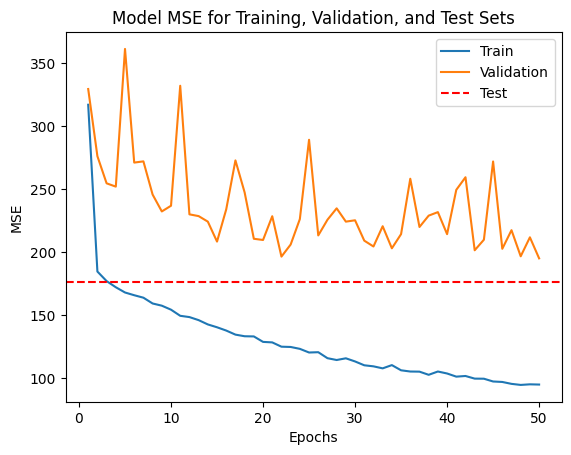

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse  , test_loss= model.evaluate(x_test_r, y_test_r)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()

## Model 2

In [ ]:
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(16, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_regularizer=l2(0.01)))
model.add(Dense(34, activation='linear', kernel_regularizer=l2(0.01)))  # Use linear activation for MSE

my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model with the custom optimizer and the desired loss function
model.compile(optimizer=my_optimizer, loss='mse', metrics=[mse])

# Define early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# Train the model on x_train and y_train
history = model.fit(x_train_r, y_train_r, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_callback])

# Evaluate the model on x_test and y_test
y_pred = model.predict(x_test_r)
mse_per_column = np.mean(np.square(y_pred - y_test_r), axis=0)

#column_names = list(y_test.columns)  # Replace 'dataset' with the actual variable name of your dataset

mse_dict = dict(zip(column_names, mse_per_column))

print("MSE per column:")
for column_name, mse_value in mse_dict.items():
    print(f"{column_name}: {mse_value}")

print(f"Average MSE: {np.mean(mse_per_column)}")


Epoch 1/50
172/172 [==============================] - 8s 14ms/step - loss: 321.2081 - mse: 313.6001 - val_loss: 315.1570 - val_mse: 302.0687
Epoch 2/50
172/172 [==============================] - 1s 9ms/step - loss: 201.0430 - mse: 185.5517 - val_loss: 280.9448 - val_mse: 263.4722
Epoch 3/50
172/172 [==============================] - 2s 9ms/step - loss: 198.3534 - mse: 180.7779 - val_loss: 291.5939 - val_mse: 273.1235
Epoch 4/50
172/172 [==============================] - 2s 9ms/step - loss: 195.3226 - mse: 176.8629 - val_loss: 279.8158 - val_mse: 260.8788
Epoch 5/50
172/172 [==============================] - 2s 9ms/step - loss: 192.8355 - mse: 173.7774 - val_loss: 270.5701 - val_mse: 251.9425
Epoch 6/50
172/172 [==============================] - 2s 10ms/step - loss: 193.3655 - mse: 174.6673 - val_loss: 277.9627 - val_mse: 260.0097
Epoch 7/50
172/172 [==============================] - 2s 13ms/step - loss: 189.9372 - mse: 170.9195 - val_loss: 302.7263 - val_mse: 282.7083
Epoch 8/50
172/17

54/54 [==============================] - 0s 4ms/step - loss: 219.5095 - mse: 200.4526


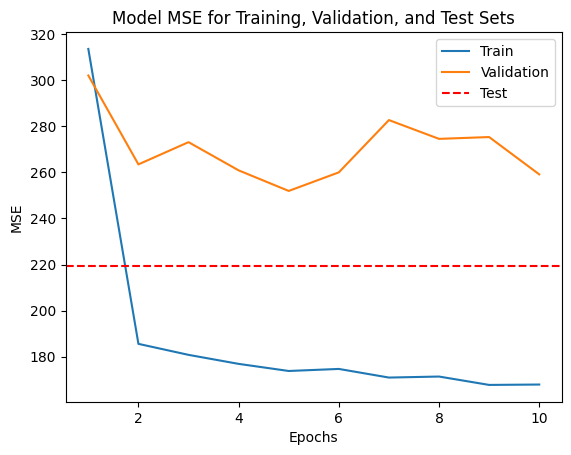

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss = model.evaluate(x_test_r, y_test_r)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()


# model 3

In [ ]:
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, input_shape=(16, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(34, activation='linear'))


my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model with the custom optimizer and the desired loss function
model.compile(optimizer=my_optimizer, loss='mse', metrics=[mse])


# Train the model on x_train and y_train
history = model.fit(x_train_r, y_train_r, epochs=80, batch_size=32, validation_split=0.2)

# Evaluate the model on x_test and y_test
y_pred = model.predict(x_test_r)
mse_per_column = np.mean(np.square(y_pred - y_test_r), axis=0)

#column_names = list(y_test.columns)  # Replace 'dataset' with the actual variable name of your dataset

mse_dict = dict(zip(column_names, mse_per_column))

print("MSE per column:")
for column_name, mse_value in mse_dict.items():
    print(f"{column_name}: {mse_value}")

print(f"Average MSE: {np.mean(mse_per_column)}")


Epoch 1/80
172/172 [==============================] - 18s 31ms/step - loss: 273.4023 - mse: 273.4023 - val_loss: 304.9209 - val_mse: 304.9209
Epoch 2/80
172/172 [==============================] - 4s 26ms/step - loss: 238.1726 - mse: 238.1726 - val_loss: 360.2126 - val_mse: 360.2126
Epoch 3/80
172/172 [==============================] - 3s 17ms/step - loss: 232.4528 - mse: 232.4528 - val_loss: 426.8610 - val_mse: 426.8610
Epoch 4/80
172/172 [==============================] - 3s 17ms/step - loss: 221.3033 - mse: 221.3033 - val_loss: 306.9308 - val_mse: 306.9308
Epoch 5/80
172/172 [==============================] - 3s 20ms/step - loss: 214.9403 - mse: 214.9403 - val_loss: 441.8702 - val_mse: 441.8702
Epoch 6/80
172/172 [==============================] - 3s 20ms/step - loss: 212.4868 - mse: 212.4868 - val_loss: 299.8356 - val_mse: 299.8356
Epoch 7/80
172/172 [==============================] - 3s 17ms/step - loss: 215.1087 - mse: 215.1087 - val_loss: 246.4953 - val_mse: 246.4953
Epoch 8/80
1

54/54 [==============================] - 0s 6ms/step - loss: 163.8335 - mse: 163.8335


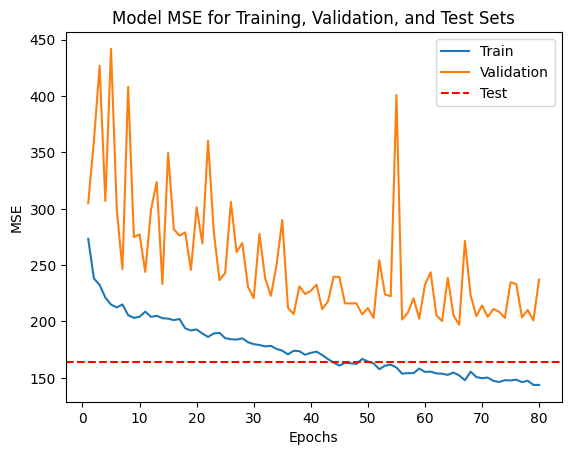

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r, y_test_r)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()


# GRU

In [ ]:
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)
model = Sequential()

# First, we'll add a convolutional layer to extract features from the input data
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(units=256, return_sequences=True))
model.add(BatchNormalization())
model.add(GRU(units=128, return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=34, activation='linear'))

my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
# compile model with appropriate loss and optimizer functions
model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
model.fit(x_train_r, y_train_r, batch_size=32, epochs=50 , validation_split=0.2 )
mse, accuracy = model.evaluate(x_test_r, y_test_r)
print(f'Test loss: {mse}, Test accuracy: {accuracy}')

Epoch 1/50
172/172 [==============================] - 8s 13ms/step - loss: 286.6490 - mse: 286.6490 - val_loss: 330.9654 - val_mse: 330.9654
Epoch 2/50
172/172 [==============================] - 1s 8ms/step - loss: 202.8363 - mse: 202.8363 - val_loss: 433.6933 - val_mse: 433.6933
Epoch 3/50
172/172 [==============================] - 1s 8ms/step - loss: 188.4905 - mse: 188.4905 - val_loss: 239.9724 - val_mse: 239.9724
Epoch 4/50
172/172 [==============================] - 1s 8ms/step - loss: 179.7704 - mse: 179.7704 - val_loss: 437.9608 - val_mse: 437.9608
Epoch 5/50
172/172 [==============================] - 1s 8ms/step - loss: 176.0597 - mse: 176.0597 - val_loss: 252.8122 - val_mse: 252.8122
Epoch 6/50
172/172 [==============================] - 1s 8ms/step - loss: 171.4579 - mse: 171.4579 - val_loss: 261.5628 - val_mse: 261.5628
Epoch 7/50
172/172 [==============================] - 2s 9ms/step - loss: 169.4840 - mse: 169.4840 - val_loss: 216.4430 - val_mse: 216.4430
Epoch 8/50
172/172 

54/54 [==============================] - 0s 4ms/step - loss: 281.7830 - mse: 281.7830


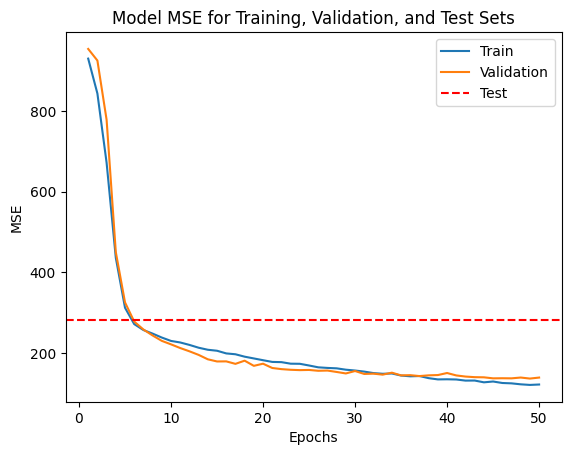

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r, y_test_r)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()

# Ensemble Network

In [ ]:
# Define custom mean squared error function
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

# Create a list to store the models
models = []

# Define the number of models in the ensemble
num_models = 3

# Define the hyperparameters for each model
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]

# Perform k-fold cross-validation to generate the training and validation indices for each model
kf = KFold(n_splits=num_models, shuffle=True)
for i, (train_indices, val_indices) in enumerate(kf.split(x_train_r)):


        # Build the model
    model = Sequential()

    # Add a convolutional layer to extract features from the input data
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # Add a bidirectional GRU layer with 256 units and return sequences
    model.add(Bidirectional(GRU(units=256, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Add another bidirectional GRU layer with 128 units and return sequences
    model.add(Bidirectional(GRU(units=128, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Add a global average pooling layer to reduce the dimensionality of the output
    model.add(GlobalAveragePooling1D())

    # Add a dense layer with 256 units and ReLU activation
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))

    # Add a dense layer with 128 units and ReLU activation
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))

    # Add an output layer with 34 units and linear activation
    model.add(Dense(units=34, activation='linear'))

    # Compile the model with appropriate loss and optimizer functions
    my_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # Train the model on the current fold's training data
    history = model.fit(x_train_r[train_indices], y_train_r[train_indices],
                        batch_size=batch_sizes[i], epochs=50, validation_data=(x_train_r[val_indices], y_train_r[val_indices]),
                        callbacks=[early_stopping_callback])

    # Append the trained model to the models list
    models.append(model)

# Evaluate the ensemble of models on the test data
# Evaluate the ensemble of models on the test data
total_mse = 0
for model in models:
    eval_mse = model.evaluate(x_test_r, y_test_r)
    total_mse += eval_mse[0]

avg_mse = total_mse / num_models
print(f'Ensemble Test MSE: {avg_mse}')


Epoch 1/50
143/143 [==============================] - 15s 25ms/step - loss: 291.3118 - mse: 291.3118 - val_loss: 242.9948 - val_mse: 242.9948
Epoch 2/50
143/143 [==============================] - 2s 14ms/step - loss: 223.3402 - mse: 223.3402 - val_loss: 201.8633 - val_mse: 201.8633
Epoch 3/50
143/143 [==============================] - 3s 20ms/step - loss: 214.6627 - mse: 214.6627 - val_loss: 199.7655 - val_mse: 199.7655
Epoch 4/50
143/143 [==============================] - 2s 16ms/step - loss: 207.7454 - mse: 207.7454 - val_loss: 194.1506 - val_mse: 194.1506
Epoch 5/50
143/143 [==============================] - 2s 14ms/step - loss: 206.4701 - mse: 206.4701 - val_loss: 201.3582 - val_mse: 201.3582
Epoch 6/50
143/143 [==============================] - 2s 14ms/step - loss: 198.7796 - mse: 198.7796 - val_loss: 182.9547 - val_mse: 182.9547
Epoch 7/50
143/143 [==============================] - 2s 14ms/step - loss: 198.7512 - mse: 198.7512 - val_loss: 168.0264 - val_mse: 168.0264
Epoch 8/50
1

38/38 [==============================] - 7s 16ms/step - loss: 656.0278 - mse: 656.0278


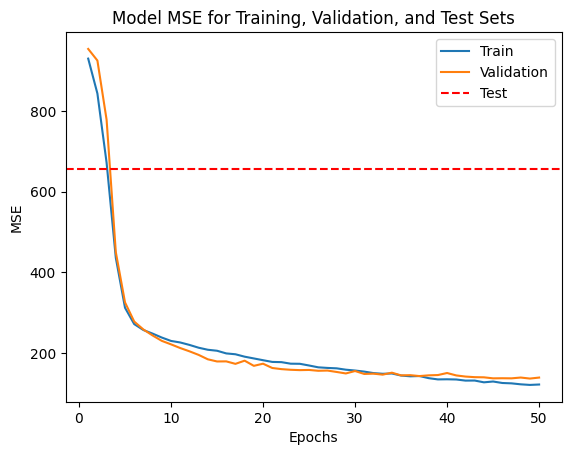

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r, y_test_r)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()

# Second Approach

In [ ]:
df_site.columns

Index(['7E13A5B8-EE Power', '7E13A5B8-EE Energy', '7E13A5B8-EE Voltage',
       '7E13A5B8-EE GF Resistance', '7E13A5B8-EE Temperature',
       '7E13A5D1-07 Power', '7E13A5D1-07 Energy', '7E13A5D1-07 Voltage',
       '7E13A5D1-07 GF Resistance', '7E13A5D1-07 Temperature',
       ...
       '7E139A3F-6A Power', '7E139A3F-6A Energy', '7E139A3F-6A Voltage',
       '7E139A3F-6A GF Resistance', '7E139A3F-6A Temperature',
       '7E130FD4-74 Power', '7E130FD4-74 Energy', '7E130FD4-74 Voltage',
       '7E130FD4-74 GF Resistance', '7E130FD4-74 Temperature'],
      dtype='object', length=175)

In [ ]:
df_w.columns

Index(['Temperature (C)', 'Feels (C)', 'Wind Speed (Kmph)', 'Wind Dir Degree',
       'Code', 'Precip (MM)', 'Humidity (%)', 'Visibility (Km)',
       'Pressure (Mb)', 'Cloud Cover (%)', 'Heat Index (C)', 'Dew Point (C)',
       'Wind Chill (C)', 'Wind Guest (Kmph)', 'Wind Dir 16 Point',
       'Description'],
      dtype='object')

In [ ]:
 y.columns

Index(['7E13A5B8-EE Power', '7E13A5D1-07 Power', '7E13A5B7-ED Power',
       '7E13A5C7-FD Power', '7E13A0DD-0E Power', '7E13A5BC-F2 Power',
       '7E142964-1F Power', '7E12506C-4C Power', '7E109421-43 Power',
       '7E1093DD-FE Power', '7E1093A6-C7 Power', '7E1093BD-DE Power',
       '7E10941C-3E Power', '7E10941A-3C Power', '7E1093A9-CA Power',
       '7E121E7F-2D Power', '7E130FDC-7C Power', '7E140DE1-80 Power',
       '7E140FEA-8B Power', '7E140E0D-AD Power', '7E140E1B-BB Power',
       '7E140E42-E2 Power', 'BE1000AB-79 Power', '7E130FB7-57 Power',
       '7E130FCC-6C Power', '7E139A3C-67 Power', '7E130FCB-6B Power',
       '7E130FE3-83 Power', '7E130FD1-71 Power', '7E139A26-51 Power',
       '7E139A40-6B Power', '7E139A3D-68 Power', '7E139A3F-6A Power',
       '7E130FD4-74 Power'],
      dtype='object')

In [ ]:
exclude_word = 'Power'

x_solar = df_site.filter(regex=f'^(?!.*{exclude_word}).*$')

print(x_solar)

                     7E13A5B8-EE Energy  7E13A5B8-EE Voltage  \
Time                                                           
2020-01-01 00:00:00                 NaN                  NaN   
2020-01-01 01:00:00                 NaN                  NaN   
2020-01-01 02:00:00                 NaN                  NaN   
2020-01-01 03:00:00                 NaN                  NaN   
2020-01-01 04:00:00                 NaN                  NaN   
...                                 ...                  ...   
2023-04-04 19:00:00                 NaN                  NaN   
2023-04-04 20:00:00                 NaN                  NaN   
2023-04-04 21:00:00                 NaN                  NaN   
2023-04-04 22:00:00                 NaN                  NaN   
2023-04-04 23:00:00                 NaN                  NaN   

                     7E13A5B8-EE GF Resistance  7E13A5B8-EE Temperature  \
Time                                                                      
2020-01-01 00:00:

In [ ]:
x_solar.columns

Index(['7E13A5B8-EE Energy', '7E13A5B8-EE Voltage',
       '7E13A5B8-EE GF Resistance', '7E13A5B8-EE Temperature',
       '7E13A5D1-07 Energy', '7E13A5D1-07 Voltage',
       '7E13A5D1-07 GF Resistance', '7E13A5D1-07 Temperature',
       '7E13A5B7-ED Energy', '7E13A5B7-ED Voltage',
       ...
       '7E139A3D-68 GF Resistance', '7E139A3D-68 Temperature',
       '7E139A3F-6A Energy', '7E139A3F-6A Voltage',
       '7E139A3F-6A GF Resistance', '7E139A3F-6A Temperature',
       '7E130FD4-74 Energy', '7E130FD4-74 Voltage',
       '7E130FD4-74 GF Resistance', '7E130FD4-74 Temperature'],
      dtype='object', length=140)

### Create second dataset

In [ ]:
x_final = pd.merge(x_weather , x_solar , left_index=True , right_index=True)
x_final.shape

(8560, 156)

In [ ]:
x_final.head()

,Temperature (C),Feels (C),Wind Speed (Kmph),Wind Dir Degree,Code,Precip (MM),Humidity (%),Visibility (Km),Pressure (Mb),Cloud Cover (%),...,7E139A3D-68 GF Resistance,7E139A3D-68 Temperature,7E139A3F-6A Energy,7E139A3F-6A Voltage,7E139A3F-6A GF Resistance,7E139A3F-6A Temperature,7E130FD4-74 Energy,7E130FD4-74 Voltage,7E130FD4-74 GF Resistance,7E130FD4-74 Temperature
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 08:00:00,-3,-11,27,267,227,0.0,85,8,1005,95,...,1896.8875,33.760183,0.000000,687.671917,2334.115,34.125625,8.333333,587.364708,2217.74,31.752517
2020-01-01 09:00:00,-3,-11,27,267,227,0.0,85,7,1006,93,...,1903.3300,41.367808,50.000000,846.984333,2303.750,41.201933,33.333333,797.588583,2288.52,39.332758
2020-01-01 10:00:00,-3,-11,28,269,227,0.0,83,5,1006,87,...,1903.3300,43.774950,116.666667,847.062500,2303.750,43.565483,91.666667,797.385333,2288.52,42.720792
2020-01-01 11:00:00,-3,-10,28,271,230,0.0,82,3,1007,81,...,1903.3300,42.586817,258.333333,846.838500,2303.750,42.815842,208.333333,797.047000,2288.52,43.816525
2020-01-01 12:00:00,-3,-10,29,273,230,0.0,80,1,1007,75,...,1903.3300,40.941633,341.666667,847.020750,2303.750,40.826275,291.666667,797.161500,2288.52,42.746658


In [ ]:
x_final.isna().sum()

Temperature (C)                 0
Feels (C)                       0
Wind Speed (Kmph)               0
Wind Dir Degree                 0
Code                            0
Precip (MM)                     0
Humidity (%)                    0
Visibility (Km)                 0
Pressure (Mb)                   0
Cloud Cover (%)                 0
Heat Index (C)                  0
Dew Point (C)                   0
Wind Chill (C)                  0
Wind Guest (Kmph)               0
Wind Dir 16 Point               0
Description                     0
7E13A5B8-EE Energy              6
7E13A5B8-EE Voltage           305
7E13A5B8-EE GF Resistance     454
7E13A5B8-EE Temperature         0
7E13A5D1-07 Energy              6
7E13A5D1-07 Voltage           390
7E13A5D1-07 GF Resistance     564
7E13A5D1-07 Temperature         0
7E13A5B7-ED Energy              5
7E13A5B7-ED Voltage           351
7E13A5B7-ED GF Resistance     527
7E13A5B7-ED Temperature         0
7E13A5C7-FD Energy              7
7E13A5C7-FD Vo

In [ ]:
x_final.dropna(inplace=True)

In [ ]:
print(x_final.shape, y_final.shape)

(6008, 156) (8560, 34)


In [ ]:
df_all = pd.merge(x_final , y_final ,left_index=True , right_index=True)
df_all.shape

(6008, 190)

In [ ]:
x_final = df_all.iloc[:,:156]
y_final_all = df_all.iloc[:,156:]
print(x_final.shape , y_final.shape)

(6008, 156) (8560, 34)


In [ ]:
#Split dataset into train and test
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_final, y_final_all, test_size = 0.2 ,shuffle=False)
print(x_train_all.shape , x_test_all.shape , y_train_all.shape , y_test_all.shape)

(4806, 156) (1202, 156) (4806, 34) (1202, 34)


In [ ]:
#scale the dataset
x_train_all = sc.fit_transform(x_train_all)
x_test_all = sc.transform(x_test_all)

# GB Regression

In [ ]:
y_pred_gb_all = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(x_train_all, y_train_all).predict(x_test_all)
# Convert y_test and y_pred to NumPy arrays
y_test_all = np.array(y_test_all)
#y_pred = np.array(y_pred_gb_all)


# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test_all.shape[1]):
    mse = mean_squared_error(y_test_all[:, i], y_pred_gb_all[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 2.436
7E13A5D1-07 Power: 1.992
7E13A5B7-ED Power: 0.651
7E13A5C7-FD Power: 2.984
7E13A0DD-0E Power: 0.809
7E13A5BC-F2 Power: 1.795
7E142964-1F Power: 1.138
7E12506C-4C Power: 0.508
7E109421-43 Power: 3.122
7E1093DD-FE Power: 3.868
7E1093A6-C7 Power: 1.785
7E1093BD-DE Power: 1.459
7E10941C-3E Power: 2.680
7E10941A-3C Power: 1.628
7E1093A9-CA Power: 2.193
7E121E7F-2D Power: 1.432
7E130FDC-7C Power: 2.395
7E140DE1-80 Power: 1.945
7E140FEA-8B Power: 1.869
7E140E0D-AD Power: 10.206
7E140E1B-BB Power: 1.694
7E140E42-E2 Power: 1.633
BE1000AB-79 Power: 1.401
7E130FB7-57 Power: 1.214
7E130FCC-6C Power: 1.813
7E139A3C-67 Power: 2.079
7E130FCB-6B Power: 2.401
7E130FE3-83 Power: 2.021
7E130FD1-71 Power: 4.735
7E139A26-51 Power: 1.382
7E139A40-6B Power: 1.793
7E139A3D-68 Power: 1.736
7E139A3F-6A Power: 2.516
7E130FD4-74 Power: 2.194
Average MSE: 2.221


# XGB Regresison

In [ ]:
xgb_gpu = XGBRegressor(tree_method='gpu_hist', gpu_id=0)
model = MultiOutputRegressor(xgb_gpu)
model.fit(x_train_all, y_train_all)
y_pred_all_xgb = model.predict(x_test_all)
# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test_all.shape[1]):
    mse = mean_squared_error(y_test_all[:, i], y_pred_all_xgb[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 2.870
7E13A5D1-07 Power: 1.818
7E13A5B7-ED Power: 0.734
7E13A5C7-FD Power: 3.513
7E13A0DD-0E Power: 0.772
7E13A5BC-F2 Power: 2.012
7E142964-1F Power: 0.817
7E12506C-4C Power: 0.482
7E109421-43 Power: 1.759
7E1093DD-FE Power: 3.582
7E1093A6-C7 Power: 2.344
7E1093BD-DE Power: 1.309
7E10941C-3E Power: 2.468
7E10941A-3C Power: 1.882
7E1093A9-CA Power: 2.239
7E121E7F-2D Power: 1.391
7E130FDC-7C Power: 1.768
7E140DE1-80 Power: 1.749
7E140FEA-8B Power: 1.541
7E140E0D-AD Power: 8.644
7E140E1B-BB Power: 1.495
7E140E42-E2 Power: 1.841
BE1000AB-79 Power: 1.695
7E130FB7-57 Power: 1.269
7E130FCC-6C Power: 1.513
7E139A3C-67 Power: 2.176
7E130FCB-6B Power: 1.747
7E130FE3-83 Power: 1.699
7E130FD1-71 Power: 4.092
7E139A26-51 Power: 1.507
7E139A40-6B Power: 1.452
7E139A3D-68 Power: 1.482
7E139A3F-6A Power: 2.042
7E130FD4-74 Power: 2.094
Average MSE: 2.053


# MultiOutputRegressor RandomForest

In [ ]:
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth,  min_samples_leaf = 15, ccp_alpha = 0.01,random_state=0)
)
regr_multirf.fit(x_train_all, y_train_all)
# Predict on new data
y_multirf_all = regr_multirf.predict(x_test_all)
# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test_all.shape[1]):
    mse = mean_squared_error(y_test_all[:, i], y_multirf_all[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 2.539
7E13A5D1-07 Power: 1.845
7E13A5B7-ED Power: 0.511
7E13A5C7-FD Power: 2.966
7E13A0DD-0E Power: 0.568
7E13A5BC-F2 Power: 2.434
7E142964-1F Power: 0.908
7E12506C-4C Power: 0.449
7E109421-43 Power: 1.914
7E1093DD-FE Power: 4.881
7E1093A6-C7 Power: 2.720
7E1093BD-DE Power: 1.920
7E10941C-3E Power: 2.005
7E10941A-3C Power: 1.984
7E1093A9-CA Power: 2.145
7E121E7F-2D Power: 1.611
7E130FDC-7C Power: 1.750
7E140DE1-80 Power: 1.977
7E140FEA-8B Power: 1.480
7E140E0D-AD Power: 6.848
7E140E1B-BB Power: 1.510
7E140E42-E2 Power: 1.831
BE1000AB-79 Power: 1.455
7E130FB7-57 Power: 1.435
7E130FCC-6C Power: 1.883
7E139A3C-67 Power: 2.274
7E130FCB-6B Power: 1.899
7E130FE3-83 Power: 1.509
7E130FD1-71 Power: 4.687
7E139A26-51 Power: 1.595
7E139A40-6B Power: 1.681
7E139A3D-68 Power: 1.525
7E139A3F-6A Power: 2.495
7E130FD4-74 Power: 2.237
Average MSE: 2.102


# RandomForestRegressor


In [ ]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,  min_samples_leaf = 15, ccp_alpha = 0.01, random_state=2)
regr_rf.fit(x_train_all, y_train_all)
y_rf_all = regr_rf.predict(x_test_all)
# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test_all.shape[1]):
    mse = mean_squared_error(y_test_all[:, i], y_rf_all[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 2.325
7E13A5D1-07 Power: 1.622
7E13A5B7-ED Power: 1.912
7E13A5C7-FD Power: 1.708
7E13A0DD-0E Power: 1.659
7E13A5BC-F2 Power: 1.668
7E142964-1F Power: 1.848
7E12506C-4C Power: 1.497
7E109421-43 Power: 4.090
7E1093DD-FE Power: 10.533
7E1093A6-C7 Power: 6.486
7E1093BD-DE Power: 3.399
7E10941C-3E Power: 3.664
7E10941A-3C Power: 4.055
7E1093A9-CA Power: 4.004
7E121E7F-2D Power: 2.295
7E130FDC-7C Power: 2.903
7E140DE1-80 Power: 2.610
7E140FEA-8B Power: 1.621
7E140E0D-AD Power: 17.300
7E140E1B-BB Power: 2.670
7E140E42-E2 Power: 1.921
BE1000AB-79 Power: 3.006
7E130FB7-57 Power: 1.994
7E130FCC-6C Power: 1.735
7E139A3C-67 Power: 1.946
7E130FCB-6B Power: 2.398
7E130FE3-83 Power: 2.812
7E130FD1-71 Power: 12.416
7E139A26-51 Power: 2.524
7E139A40-6B Power: 1.922
7E139A3D-68 Power: 1.442
7E139A3F-6A Power: 1.722
7E130FD4-74 Power: 2.448
Average MSE: 3.475


In [ ]:
print(x_train_all.shape , x_test_all.shape)

(4806, 156) (1202, 156)


# ensemble method

In [ ]:
from sklearn.svm import SVR
# Train additional base models
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train_all, y_train_all)

svr = MultiOutputRegressor(SVR())
svr.fit(x_train_all, y_train_all)

gb =  MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
gb.fit(x_train_all, y_train_all)

# Combine predictions using a meta-model
meta_model = LinearRegression()
meta_features = np.hstack([gb.predict(x_train_all), rf.predict(x_train_all), svr.predict(x_train_all)])
meta_model.fit(meta_features, y_train_all)

# Make predictions using the meta-model
meta_features_test = np.hstack([gb.predict(x_test_all), rf.predict(x_test_all), svr.predict(x_test_all)])
y_pred_ensemble = meta_model.predict(meta_features_test)

# Calculate MSE for each target column
mse_per_column = []
for i in range(y_test_all.shape[1]):
    mse = mean_squared_error(y_test_all[:, i], y_pred_ensemble[:, i])
    mse_per_column.append(mse)

# Print the MSE values with column names
print("MSE per column:")
for column_name, mse_value in zip(column_names, mse_per_column):
    print("{}: {:.3f}".format(column_name, mse_value))

# Print the average MSE across all targets
print("Average MSE: {:.3f}".format(np.mean(mse_per_column)))

MSE per column:
7E13A5B8-EE Power: 1.449
7E13A5D1-07 Power: 1.197
7E13A5B7-ED Power: 1.388
7E13A5C7-FD Power: 1.130
7E13A0DD-0E Power: 1.179
7E13A5BC-F2 Power: 1.122
7E142964-1F Power: 1.297
7E12506C-4C Power: 0.964
7E109421-43 Power: 3.194
7E1093DD-FE Power: 8.666
7E1093A6-C7 Power: 4.750
7E1093BD-DE Power: 2.407
7E10941C-3E Power: 3.150
7E10941A-3C Power: 3.026
7E1093A9-CA Power: 2.901
7E121E7F-2D Power: 1.280
7E130FDC-7C Power: 2.309
7E140DE1-80 Power: 1.543
7E140FEA-8B Power: 1.534
7E140E0D-AD Power: 16.043
7E140E1B-BB Power: 2.169
7E140E42-E2 Power: 1.633
BE1000AB-79 Power: 2.287
7E130FB7-57 Power: 1.554
7E130FCC-6C Power: 1.431
7E139A3C-67 Power: 1.902
7E130FCB-6B Power: 2.240
7E130FE3-83 Power: 2.467
7E130FD1-71 Power: 11.327
7E139A26-51 Power: 1.995
7E139A40-6B Power: 1.489
7E139A3D-68 Power: 1.382
7E139A3F-6A Power: 1.721
7E130FD4-74 Power: 2.245
Average MSE: 2.835


# Deep Neural Network

In [ ]:
y_train_r_all = y_train_all.values
#x_test_r = x_test.values
y_test_r_all = y_test_all

# Reshape the input data to have three dimensions
x_train_r_all = x_train_all.reshape((4806, 156, 1))
x_test_r_all = x_test_all.reshape((1202, 156, 1))

# CNN-LSTM

In [ ]:
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(156, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_regularizer=l2(0.01)))
model.add(Dense(34, activation='linear', kernel_regularizer=l2(0.01)))  # Use linear activation for MSE

# Compile the model with MSE loss and custom metric
my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model with the custom optimizer and the desired loss function
model.compile(optimizer=my_optimizer, loss='mse', metrics=[mse])

# Define early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# Train the model on x_train and y_train
history = model.fit(x_train_r_all, y_train_r_all, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_callback])

# Evaluate the model on x_test and y_test
mse = model.evaluate(x_test_r_all, y_test_r_all)
print(f'Test loss: {mse}')


Epoch 1/50
121/121 [==============================] - 7s 19ms/step - loss: 351.8344 - mse: 346.1186 - val_loss: 101.4081 - val_mse: 88.7772
Epoch 2/50
121/121 [==============================] - 2s 16ms/step - loss: 61.4421 - mse: 44.3269 - val_loss: 144.9626 - val_mse: 124.5014
Epoch 3/50
121/121 [==============================] - 2s 14ms/step - loss: 57.3485 - mse: 35.5457 - val_loss: 39.4925 - val_mse: 17.3063
Epoch 4/50
121/121 [==============================] - 1s 11ms/step - loss: 48.8456 - mse: 27.3359 - val_loss: 35.9276 - val_mse: 14.5361
Epoch 5/50
121/121 [==============================] - 1s 10ms/step - loss: 49.5031 - mse: 28.0770 - val_loss: 48.5273 - val_mse: 27.8996
Epoch 6/50
121/121 [==============================] - 1s 10ms/step - loss: 44.0818 - mse: 23.4205 - val_loss: 271.0192 - val_mse: 249.4250
Epoch 7/50
121/121 [==============================] - 1s 11ms/step - loss: 45.1721 - mse: 24.5791 - val_loss: 51.5647 - val_mse: 31.4422
Epoch 8/50
121/121 [==============

38/38 [==============================] - 0s 5ms/step - loss: 47.4636 - mse: 28.0261


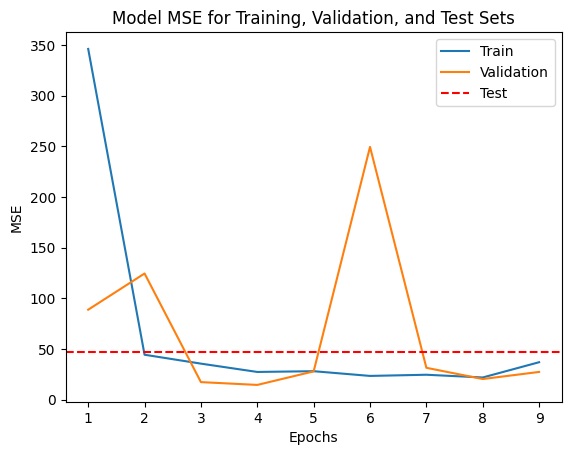

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()


In [ ]:
config = tf.compat.v1.ConfigProto(device_count={'GPU': 1})
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, input_shape=(156, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(34, activation='linear'))


my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model with the custom optimizer and the desired loss function
model.compile(optimizer=my_optimizer, loss='mse', metrics=[mse])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# Train the model on x_train and y_train
history = model.fit(x_train_r_all, y_train_r_all, epochs=80, batch_size=32, validation_split=0.2 , callbacks=[early_stopping_callback])

# Evaluate the model on x_test and y_test
y_pred = model.predict(x_test_r_all)
mse_per_column = np.mean(np.square(y_pred - y_test_r_all), axis=0)

#column_names = list(y_test.columns)  # Replace 'dataset' with the actual variable name of your dataset
column_names = list(y.columns)
mse_dict = dict(zip(column_names, mse_per_column))

print("MSE per column:")
for column_name, mse_value in mse_dict.items():
    print(f"{column_name}: {mse_value}")

print(f"Average MSE: {np.mean(mse_per_column)}")

Epoch 1/80
121/121 [==============================] - 17s 38ms/step - loss: 138.6696 - mse: 138.6696 - val_loss: 408.5791 - val_mse: 408.5791
Epoch 2/80
121/121 [==============================] - 3s 24ms/step - loss: 90.2092 - mse: 90.2092 - val_loss: 87.1889 - val_mse: 87.1889
Epoch 3/80
121/121 [==============================] - 3s 24ms/step - loss: 74.2261 - mse: 74.2261 - val_loss: 57.6226 - val_mse: 57.6226
Epoch 4/80
121/121 [==============================] - 4s 30ms/step - loss: 72.7788 - mse: 72.7788 - val_loss: 27.2083 - val_mse: 27.2083
Epoch 5/80
121/121 [==============================] - 3s 25ms/step - loss: 66.4990 - mse: 66.4990 - val_loss: 117.5459 - val_mse: 117.5459
Epoch 6/80
121/121 [==============================] - 3s 24ms/step - loss: 63.1763 - mse: 63.1763 - val_loss: 23.9618 - val_mse: 23.9618
Epoch 7/80
121/121 [==============================] - 3s 23ms/step - loss: 61.1605 - mse: 61.1605 - val_loss: 23.6465 - val_mse: 23.6465
Epoch 8/80
121/121 [==============

38/38 [==============================] - 2s 10ms/step - loss: 56.2409 - mse: 56.2409


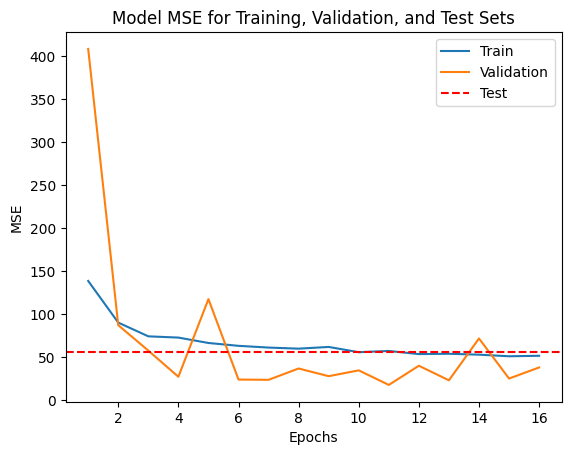

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()


# GRU

In [ ]:
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)
model = Sequential()

# First, we'll add a convolutional layer to extract features from the input data
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(156, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(units=256, return_sequences=True))
model.add(BatchNormalization())
model.add(GRU(units=128, return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=34, activation='linear'))

my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
# compile model with appropriate loss and optimizer functions
model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
model.fit(x_train_r_all, y_train_r_all, batch_size=32, epochs=50 , validation_split=0.2 )
mse, accuracy = model.evaluate(x_test_r_all, y_test_r_all)
print(f'Test loss: {mse}, Test accuracy: {accuracy}')

Epoch 1/50
121/121 [==============================] - 8s 20ms/step - loss: 124.8261 - mse: 124.8261 - val_loss: 126.9619 - val_mse: 126.9619
Epoch 2/50
121/121 [==============================] - 2s 13ms/step - loss: 55.1611 - mse: 55.1611 - val_loss: 32.2997 - val_mse: 32.2997
Epoch 3/50
121/121 [==============================] - 1s 12ms/step - loss: 43.9791 - mse: 43.9791 - val_loss: 14.6207 - val_mse: 14.6207
Epoch 4/50
121/121 [==============================] - 2s 13ms/step - loss: 38.8605 - mse: 38.8605 - val_loss: 60.8879 - val_mse: 60.8879
Epoch 5/50
121/121 [==============================] - 2s 14ms/step - loss: 36.7643 - mse: 36.7643 - val_loss: 74.5051 - val_mse: 74.5051
Epoch 6/50
121/121 [==============================] - 2s 17ms/step - loss: 30.1103 - mse: 30.1103 - val_loss: 41.8875 - val_mse: 41.8875
Epoch 7/50
121/121 [==============================] - 2s 14ms/step - loss: 28.3800 - mse: 28.3800 - val_loss: 110.2778 - val_mse: 110.2778
Epoch 8/50
121/121 [===============

38/38 [==============================] - 0s 6ms/step - loss: 12.1131 - mse: 12.1131


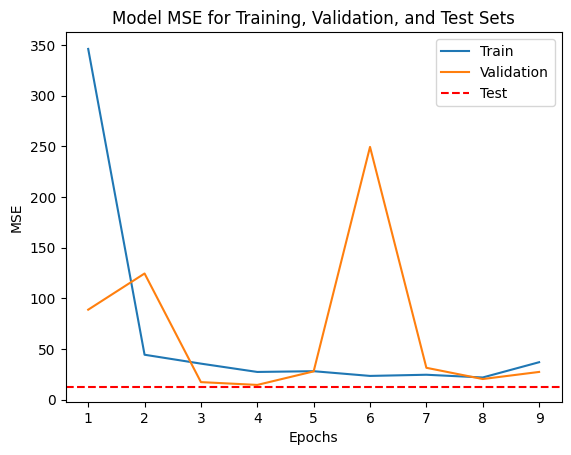

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()


In [ ]:
# Define custom mean squared error function
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

from tensorflow.keras.layers import GlobalAveragePooling1D, concatenate
# Build the model
model = Sequential()

# Add a convolutional layer to extract features from the input data
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(156, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Add a bidirectional GRU layer with 256 units and return sequences
model.add(Bidirectional(GRU(units=256, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add another bidirectional GRU layer with 128 units and return sequences
model.add(Bidirectional(GRU(units=128, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add a global average pooling layer to reduce the dimensionality of the output
model.add(GlobalAveragePooling1D())

# Add a dense layer with 256 units and ReLU activation
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

# Add an output layer with 34 units and linear activation
model.add(Dense(units=34, activation='linear'))

# Compile the model with appropriate loss and optimizer functions
my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
# Train the model
history =  model.fit(x_train_r_all, y_train_r_all, batch_size=32, epochs=50, validation_split=0.2 )

# Evaluate the model on the test data
mse = model.evaluate(x_test_r_all, y_test_r_all)
print(f'Test loss: {mse}')


Epoch 1/50
121/121 [==============================] - 14s 38ms/step - loss: 303.5677 - mse: 303.5677 - val_loss: 46.3630 - val_mse: 46.3630
Epoch 2/50
121/121 [==============================] - 3s 24ms/step - loss: 108.7336 - mse: 108.7336 - val_loss: 77.1012 - val_mse: 77.1012
Epoch 3/50
121/121 [==============================] - 3s 27ms/step - loss: 86.3481 - mse: 86.3481 - val_loss: 49.2921 - val_mse: 49.2921
Epoch 4/50
121/121 [==============================] - 3s 25ms/step - loss: 67.1704 - mse: 67.1704 - val_loss: 193.0149 - val_mse: 193.0149
Epoch 5/50
121/121 [==============================] - 3s 25ms/step - loss: 63.5094 - mse: 63.5094 - val_loss: 482.5093 - val_mse: 482.5093
Epoch 6/50
121/121 [==============================] - 3s 24ms/step - loss: 58.6266 - mse: 58.6266 - val_loss: 48.4827 - val_mse: 48.4827
Epoch 7/50
121/121 [==============================] - 3s 26ms/step - loss: 54.2274 - mse: 54.2274 - val_loss: 13.2908 - val_mse: 13.2908
Epoch 8/50
121/121 [============

38/38 [==============================] - 0s 10ms/step - loss: 8.3365 - mse: 8.3365


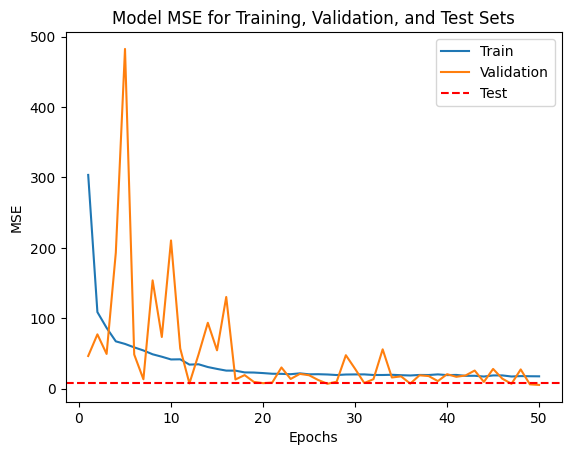

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()

In [ ]:
# Define custom mean squared error function
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

# Build the model
model = Sequential()

# Add a convolutional layer to extract features from the input data
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(156, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Add a bidirectional GRU layer with 256 units and return sequences
model.add(Bidirectional(GRU(units=256, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add another bidirectional GRU layer with 128 units and return sequences
model.add(Bidirectional(GRU(units=128, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add a global average pooling layer to reduce the dimensionality of the output
model.add(GlobalAveragePooling1D())

# Add a dense layer with 256 units and ReLU activation
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

# Add an output layer with 34 units and linear activation
model.add(Dense(units=34, activation='linear'))

# Compile the model with appropriate loss and optimizer functions
my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# Train the model
history =  model.fit(x_train_r_all, y_train_r_all, batch_size=32, epochs=50, validation_split=0.2 , callbacks=[early_stopping_callback])

# Evaluate the model on the test data
mse = model.evaluate(x_test_r_all, y_test_r_all)
print(f'Test loss: {mse}')

Epoch 1/50
121/121 [==============================] - 14s 38ms/step - loss: 281.9196 - mse: 281.9196 - val_loss: 93.5407 - val_mse: 93.5407
Epoch 2/50
121/121 [==============================] - 3s 26ms/step - loss: 106.1788 - mse: 106.1788 - val_loss: 80.9036 - val_mse: 80.9036
Epoch 3/50
121/121 [==============================] - 3s 24ms/step - loss: 80.6240 - mse: 80.6240 - val_loss: 61.0043 - val_mse: 61.0043
Epoch 4/50
121/121 [==============================] - 3s 24ms/step - loss: 74.6890 - mse: 74.6890 - val_loss: 62.4871 - val_mse: 62.4871
Epoch 5/50
121/121 [==============================] - 3s 24ms/step - loss: 68.4996 - mse: 68.4996 - val_loss: 40.1782 - val_mse: 40.1782
Epoch 6/50
121/121 [==============================] - 3s 26ms/step - loss: 60.9117 - mse: 60.9117 - val_loss: 102.3423 - val_mse: 102.3423
Epoch 7/50
121/121 [==============================] - 3s 26ms/step - loss: 57.4466 - mse: 57.4466 - val_loss: 100.7294 - val_mse: 100.7294
Epoch 8/50
121/121 [============

38/38 [==============================] - 0s 9ms/step - loss: 23.5456 - mse: 23.5456


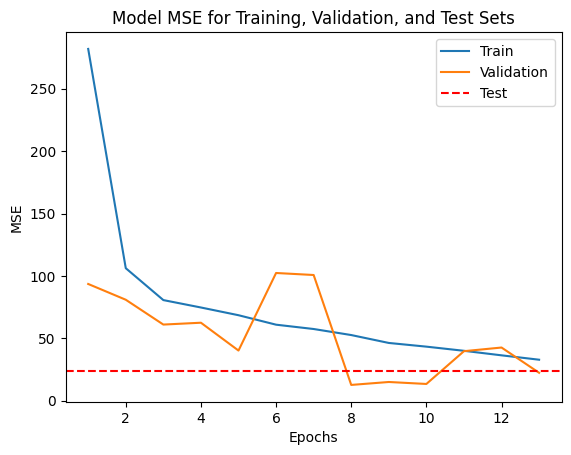

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()

In [ ]:
# Define custom mean squared error function
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

# Build the model
model = Sequential()

# Add a convolutional layer to extract features from the input data
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(156, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Add a bidirectional GRU layer with 256 units and return sequences
model.add(Bidirectional(GRU(units=256, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add another bidirectional GRU layer with 128 units and return sequences
model.add(Bidirectional(GRU(units=128, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add a global average pooling layer to reduce the dimensionality of the output
model.add(GlobalAveragePooling1D())

# Add a dense layer with 256 units and ReLU activation
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

# Add an output layer with 34 units and linear activation
model.add(Dense(units=34, activation='linear'))

# Compile the model with appropriate loss and optimizer functions
my_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# Train the model
history =  model.fit(x_train_r_all, y_train_r_all, batch_size=32, epochs=50, validation_split=0.2 , callbacks=[early_stopping_callback])

# Evaluate the model on the test data
mse = model.evaluate(x_test_r_all, y_test_r_all)
print(f'Test loss: {mse}')

Epoch 1/50
121/121 [==============================] - 15s 42ms/step - loss: 90.1554 - mse: 90.1554 - val_loss: 41.3888 - val_mse: 41.3888
Epoch 2/50
121/121 [==============================] - 3s 25ms/step - loss: 42.6711 - mse: 42.6711 - val_loss: 33.8829 - val_mse: 33.8829
Epoch 3/50
121/121 [==============================] - 3s 24ms/step - loss: 36.8656 - mse: 36.8656 - val_loss: 49.8108 - val_mse: 49.8108
Epoch 4/50
121/121 [==============================] - 3s 24ms/step - loss: 30.0699 - mse: 30.0699 - val_loss: 23.8405 - val_mse: 23.8405
Epoch 5/50
121/121 [==============================] - 3s 26ms/step - loss: 31.6397 - mse: 31.6397 - val_loss: 19.6964 - val_mse: 19.6964
Epoch 6/50
121/121 [==============================] - 3s 26ms/step - loss: 26.4759 - mse: 26.4759 - val_loss: 11.9622 - val_mse: 11.9622
Epoch 7/50
121/121 [==============================] - 3s 25ms/step - loss: 26.4634 - mse: 26.4634 - val_loss: 39.8921 - val_mse: 39.8921
Epoch 8/50
121/121 [====================

38/38 [==============================] - 0s 10ms/step - loss: 11.1182 - mse: 11.1182


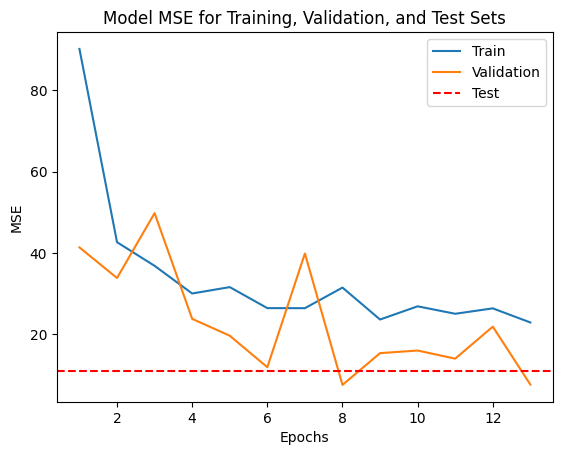

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()

# Ensemble Network

In [ ]:
from sklearn.model_selection import KFold

# Define custom mean squared error function
def mse(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

# Create a list to store the models
models = []

# Define the number of models in the ensemble
num_models = 3

# Define the hyperparameters for each model
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]

# Perform k-fold cross-validation to generate the training and validation indices for each model
kf = KFold(n_splits=num_models, shuffle=True)
for i, (train_indices, val_indices) in enumerate(kf.split(x_train_r_all)):


        # Build the model
    model = Sequential()

    # Add a convolutional layer to extract features from the input data
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(156, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # Add a bidirectional GRU layer with 256 units and return sequences
    model.add(Bidirectional(GRU(units=256, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Add another bidirectional GRU layer with 128 units and return sequences
    model.add(Bidirectional(GRU(units=128, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Add a global average pooling layer to reduce the dimensionality of the output
    model.add(GlobalAveragePooling1D())

    # Add a dense layer with 256 units and ReLU activation
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))

    # Add a dense layer with 128 units and ReLU activation
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))

    # Add an output layer with 34 units and linear activation
    model.add(Dense(units=34, activation='linear'))

    # Compile the model with appropriate loss and optimizer functions
    my_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    model.compile(loss='mse', optimizer=my_optimizer, metrics=[mse])
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # Train the model on the current fold's training data
    history = model.fit(x_train_r_all[train_indices], y_train_r_all[train_indices],
                        batch_size=batch_sizes[i], epochs=50, validation_data=(x_train_r_all[val_indices], y_train_r_all[val_indices]),
                        callbacks=[early_stopping_callback])

    # Append the trained model to the models list
    models.append(model)

# Evaluate the ensemble of models on the test data
# Evaluate the ensemble of models on the test data
total_mse = 0
for model in models:
    eval_mse = model.evaluate(x_test_r_all, y_test_r_all)
    total_mse += eval_mse[0]

avg_mse = total_mse / num_models
print(f'Ensemble Test MSE: {avg_mse}')


Epoch 1/50
101/101 [==============================] - 15s 65ms/step - loss: 103.8183 - mse: 103.8183 - val_loss: 43.6084 - val_mse: 43.6084
Epoch 2/50
101/101 [==============================] - 3s 27ms/step - loss: 50.7402 - mse: 50.7402 - val_loss: 26.8036 - val_mse: 26.8036
Epoch 3/50
101/101 [==============================] - 3s 29ms/step - loss: 42.1731 - mse: 42.1731 - val_loss: 16.0364 - val_mse: 16.0364
Epoch 4/50
101/101 [==============================] - 3s 29ms/step - loss: 29.9090 - mse: 29.9090 - val_loss: 13.8462 - val_mse: 13.8462
Epoch 5/50
101/101 [==============================] - 3s 31ms/step - loss: 31.8536 - mse: 31.8536 - val_loss: 12.8530 - val_mse: 12.8530
Epoch 6/50
101/101 [==============================] - 3s 29ms/step - loss: 32.8832 - mse: 32.8832 - val_loss: 14.7752 - val_mse: 14.7752
Epoch 7/50
101/101 [==============================] - 3s 29ms/step - loss: 31.7383 - mse: 31.7383 - val_loss: 12.0549 - val_mse: 12.0549
Epoch 8/50
101/101 [==================

38/38 [==============================] - 1s 13ms/step - loss: 10.0110 - mse: 10.0110


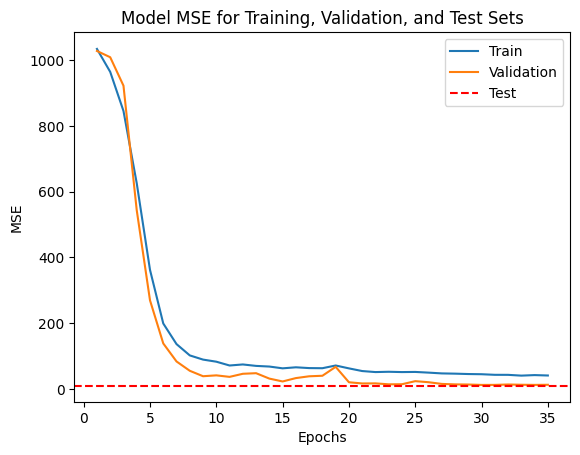

In [ ]:
# Get the train, test, and validation MSE values from the history object
train_mse = history.history['mse']
val_mse = history.history['val_mse']
test_mse , test_loss= model.evaluate(x_test_r_all, y_test_r_all)

# Plot the train, validation, and test MSE values
plt.plot(range(1, len(train_mse)+1), train_mse, label='Train')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation')
plt.axhline(y=test_mse, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model MSE for Training, Validation, and Test Sets')
plt.legend()
plt.show()